# Week 3 - Classification

This week, we shift from gathering human textual classifications through crowdsourcing, to using machine learning models and algorithms that train on those human classifications and extend them to documents far too numerous to read. If you recall, *clustering* allows us to stably partition text data (e.g., documents, turns of conversation) according to all patterns of covariation among available text features. *Classification*, by contrast, partitions text data according to only those features and their variation that enable us to mimic and extrapolate human annotations.

In this notebook, we will show how to use a variety of classification methods, including Naïve Bayes, Logistic regression, K-nearest neighbor, decision trees and random forests, support vector machines and even a simple neural network, the perceptron. We will also demonstrate ensemble techniques that can link several such methods into a single, more accurate, classification pipeline. We will finally learn to use conventions and metrics to evaluate classifier performance on out-of-sample data. 

For this notebook we will be using the following packages.

In [1]:
#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
import lucem_illud_2020 #pip install -U git+git://github.com/Computational-Content-Analysis-2020/lucem_illud_2020.git

#All these packages need to be installed from pip
#For ML
import sklearn
import sklearn.naive_bayes
import sklearn.tree
import sklearn.ensemble
import sklearn.neural_network
import sklearn.decomposition

import numpy as np #arrays
import matplotlib.pyplot as plt #Plots
import matplotlib.colors # For nice colours
import seaborn #Makes plots look nice, also heatmaps
import scipy as sp #for interp

#These are from the standard library
import collections
import os
import os.path
import random
import re
import glob
import pandas
import requests
import json
import math

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook.
#Also you can ignore the warning
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

# Simple Simulated Examples

Here we create a sandbox for you to explore different types of classified data and how different statistical classifiers perform on each type.

## Generating example data

We start by loading one of the "cartoon" or simplified data sets and then dividing it into training and testing sets. To maximize our ability to visualize, each dataset involves two classes, colored yellow and blue, arrayed along two dimensions (`x` and `y`). 

The four data patterns include: 
+ `random` in which the two classes are randomly distributed across both dimensions
+ `andSplit` in which the two classes are linearly split along one of two dimensions (e.g., men like Adidas)
+ `xorSplit` in which the two classes are split, oppositely, along each dimension (e.g., old ladies and young men like Nikes)
+ `targetSplit` in which one class is nested within the other in two dimensions (e.g., middle aged, middle income people like vintage Mustangs)
+ `multiBlobs` in which 5 classes are placed as bivariate Gaussians at random locations

`noise` is a variable [0-1] that ranges from no noise in the prescribed pattern [0] to complete noise/randomness [1].

Uncomment (remove the # in front of) each dataset, one at a time, and then run the cell and subsequent cells to examine how each machine learning approach captures each pattern.

In [2]:
noise = .2

#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise)) #Please try this one
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))

We can easily visualize the rendered datasets because they are generated in two dimensions.

Let's see what dfTrain, a simulated data that we just made, looks like

In [3]:
dfTrain

,vect,category
603,"[-0.5856323357838755, 0.08540596548752544]",1
245,"[-0.10740982423014228, -0.6039960742331257]",1
911,"[0.43280360861630685, -0.725530716271215]",1
416,"[0.09211749505586668, 0.30069207504657086]",0
832,"[0.045435322345551296, 0.2921271060870178]",0
...,...,...
265,"[0.3993069400116779, 0.03506486228383932]",1
718,"[-0.29276108956632635, 0.19733142076073612]",0
167,"[-0.28186428124421903, -0.2426333491166357]",1
532,"[-0.053304631974849574, -0.27280255781156276]",0


So, dfTrain has two columns, vect and category. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


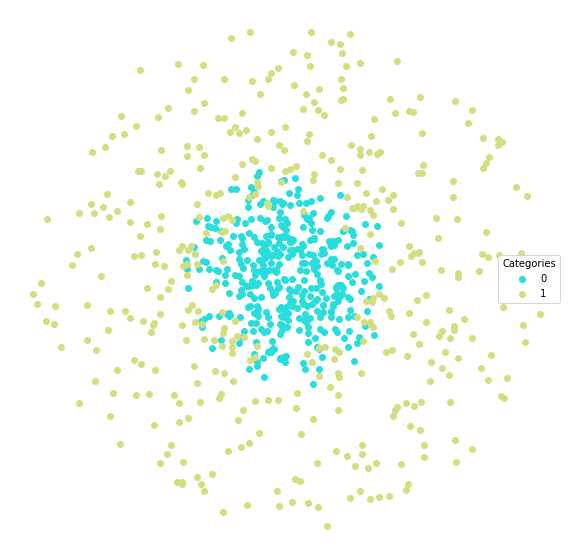

In [4]:
lucem_illud_2020.plotter(dfTrain)

## Training a Machine Learning algorithm

We can now pick a model, there are many more options in `scikit-learn`. These are just a few examples, which array along the machine learning "tribes" described in Pedro Domingos _The Master Algorithm_.

Uncomment (remove the # in front of) each algorithm one at a time, then run the cell and subsequent cells to evaluate how it learns to understand the data.

In [5]:
#Bayes
#clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

We're using sklearn here. What is sklearn? It's an open source machine learning library for Python. We use sklearn because it features various machine learning algorithms and it works well with NumPy library. You don't need to understand the sklearn package in detail for the moment, but let's see what methods and attributes sklearn has, because we're going to use some of them:

In [6]:
dir(sklearn)

['__SKLEARN_SETUP__',
 '__all__',
 '__builtins__',
 '__cached__',
 '__check_build',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_config',
 '_distributor_init',
 'base',
 'clone',
 'config_context',
 'decomposition',
 'dummy',
 'ensemble',
 'exceptions',
 'externals',
 'get_config',
 'linear_model',
 'logger',
 'logging',
 'metrics',
 'model_selection',
 'naive_bayes',
 'neighbors',
 'neural_network',
 'os',
 'preprocessing',
 're',
 'set_config',
 'setup_module',
 'show_versions',
 'svm',
 'sys',
 'tree',
 'utils']

Now we fit the model by giving it our training data

In [7]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

Here, "stack" function is used. Why did we use stack function here? This is because dfTrain['vect'] is a sequence, while clf.fit() takes an array element. Let's see what dfTrain['vect'] looks like:

In [8]:
dfTrain['vect']

603       [-0.5856323357838755, 0.08540596548752544]
245      [-0.10740982423014228, -0.6039960742331257]
911        [0.43280360861630685, -0.725530716271215]
416       [0.09211749505586668, 0.30069207504657086]
832       [0.045435322345551296, 0.2921271060870178]
                           ...                      
265        [0.3993069400116779, 0.03506486228383932]
718      [-0.29276108956632635, 0.19733142076073612]
167      [-0.28186428124421903, -0.2426333491166357]
532    [-0.053304631974849574, -0.27280255781156276]
88        [-0.10350504054540915, 0.2331474410695103]
Name: vect, Length: 800, dtype: object

And let's see what np.stack(dfTrain['vect']) does:

In [9]:
np.stack(dfTrain['vect'])

array([[-0.58563234,  0.08540597],
       [-0.10740982, -0.60399607],
       [ 0.43280361, -0.72553072],
       ...,
       [-0.28186428, -0.24263335],
       [-0.05330463, -0.27280256],
       [-0.10350504,  0.23314744]])

As you can see, stack function takes a sequence of arrays (which have the same shape) and joins them along a new axis.

## Algorithm evaluation

We can look at few measurements of each classifier's performance by using the testing set

In [10]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.07,0.927939,0.919643,0.902067,0.953704
1,0.07,0.927939,0.943182,0.895914,0.902174


This lets us look at which classes do better:

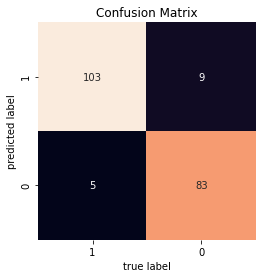

In [11]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

The greater the area under the curve the better.

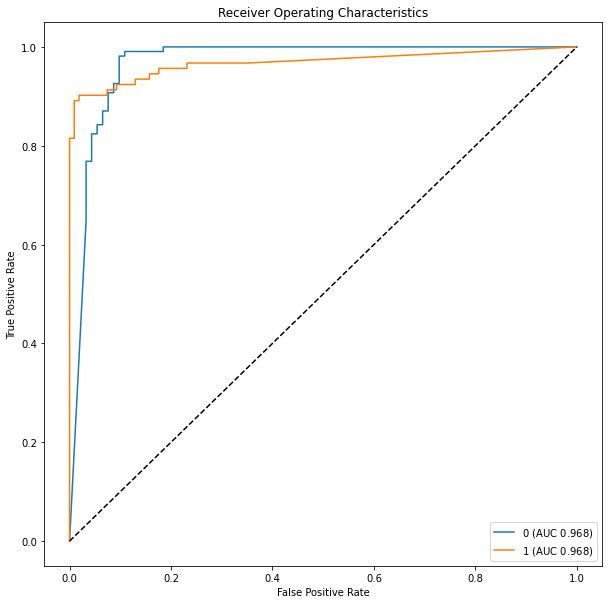

In [12]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

We can also look at the regions the classifer identifies as one class or the other:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


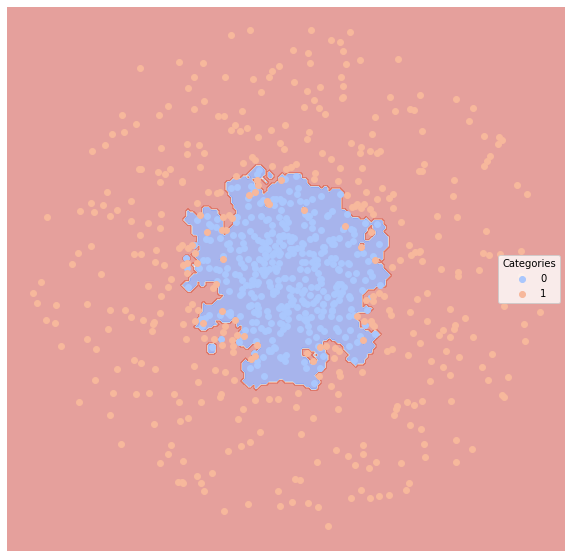

In [13]:
lucem_illud_2020.plotregions(clf, dfTrain)

## Now we do the same for real data

Available data sets include:
+ Reddit threads "classified" by thread topic
+ 20 newsgroups "classified" by group topic
+ Senate press releases "classified" by Senator (2 senators)
+ Senate press releases "classified" by Senator (5 senators)
+ Emails classified as Spam or Ham

In [14]:
import sklearn.feature_extraction

In [15]:
dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
#dfTrain, dfTest = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())

Loading Reddit data
Converting to vectors


In [16]:
#Bayes
clf = sklearn.naive_bayes.GaussianNB()

#Analogizes
#clf = sklearn.svm.SVC(kernel = 'linear', probability = True) #slow, set probability = False to speed up, but lose ROC
#clf = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = True) #slower
#clf = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')# k, 'distance' or 'uniform'

#Classical Regression
#clf = sklearn.linear_model.LogisticRegression()

#Symbolists
#clf = sklearn.tree.DecisionTreeClassifier()
#clf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
#clf = sklearn.neural_network.MLPClassifier()

#Ensemble
#clf = sklearn.ensemble.GradientBoostingClassifier()

In [17]:
clf.fit(np.stack(dfTrain['vect'], axis=0), dfTrain['category'])

GaussianNB(priors=None, var_smoothing=1e-09)

In [18]:
lucem_illud_2020.evaluateClassifier(clf, dfTest)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Tales From Tech Support,0.050157,0.903780,0.968750,0.834183,0.815789
Weeaboo Tales,0.200627,0.852690,0.567376,0.556273,0.963855
Relationships,0.181818,0.704755,0.833333,0.527110,0.444444
Bad Roommates,0.156740,0.760958,0.651515,0.484856,0.614286


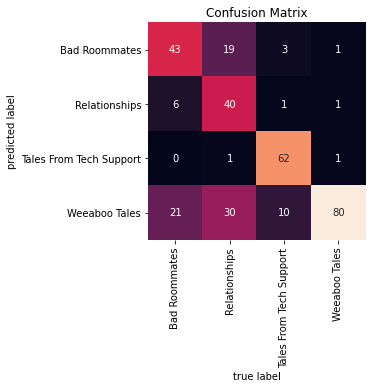

In [19]:
lucem_illud_2020.plotConfusionMatrix(clf, dfTest)

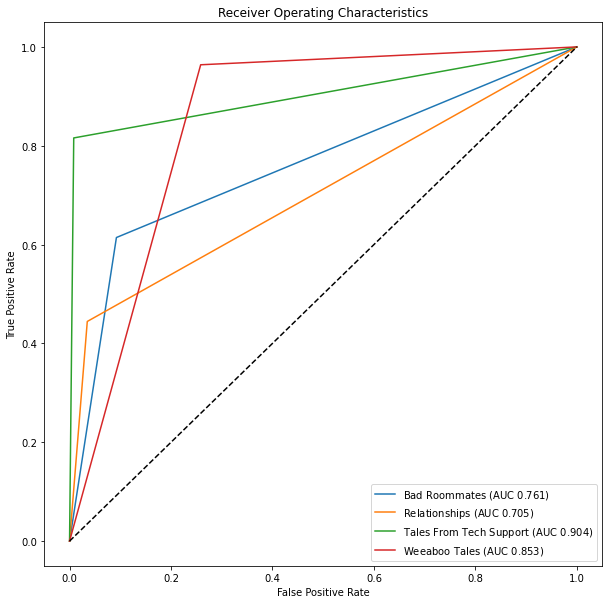

In [20]:
lucem_illud_2020.plotMultiROC(clf, dfTest)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

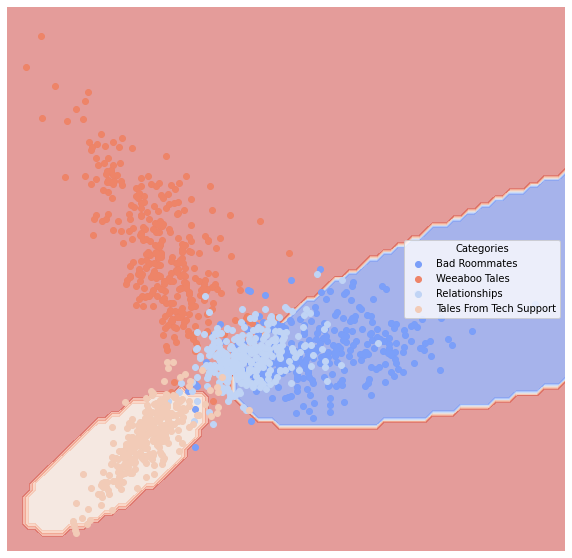

In [21]:
lucem_illud_2020.plotregions(clf, dfTrain)

## <span style="color:red">*Exercise 1*</span>

<span style="color:red">Go back through all of the cells above and generate 10 distinct artificial datasets and classify them with all of the available methods. Add a cell immediately below and describe which classifier(s) worked best with which artificially constructed data source and why. Then go through all of the empirical datasets (i.e., Newsgroups, Senate Small, Senate Large, Email Spam) and classify them with all available methods. Add a second cell immediately below and describe which classifier(s) worked best with which data set and why.

<span style="color:red">***Stretch*** (but also required) Wander through the SKLearn documentation available [here](http://scikit-learn.org/stable/), particularly perusing the classifiers. In cells following, identify and implement a new classifier that we have not yet used (e.g., AdaBoost, CART) on one artificial dataset and one real dataset (used above). Then, in the next cell describe the classifier, detail how it compares with the approaches above, and why it performed better or worse than others.

In [22]:
from sklearn import datasets
#generate datasets
noise = .2
dfTrain_1, dfTest_1 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
dfTrain_2, dfTest_2 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.random())
dfTrain_3, dfTest_3 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
dfTrain_4, dfTest_4 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.andSplit(noise))
dfTrain_5, dfTest_5 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise))
dfTrain_6, dfTest_6 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.xorSplit(noise))
dfTrain_7, dfTest_7 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
dfTrain_8, dfTest_8 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.targetSplit(noise))
dfTrain_9, dfTest_9 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))
dfTrain_10, dfTest_10 = lucem_illud_2020.trainTestSplit(lucem_illud_2020.multiBlobs(noise))
trains = [dfTrain_1,dfTrain_2,dfTrain_3,dfTrain_4,dfTrain_5,dfTrain_6,dfTrain_7,dfTrain_8,dfTrain_9,dfTrain_10]
tests = [dfTest_1,dfTest_2,dfTest_3,dfTest_4,dfTest_5,dfTest_6,dfTest_7,dfTest_8,dfTest_9,dfTest_10]

#get algorithms
#Bayes
clf_bayes = sklearn.naive_bayes.GaussianNB()

#Analogizes
clf_svc_linear = sklearn.svm.SVC(kernel = 'linear', probability = False) 
clf_svc_poly = sklearn.svm.SVC(kernel = 'poly', degree = 3, probability = False)
clf_knn = sklearn.neighbors.KNeighborsClassifier(5, weights='distance')

#Classical Regression
clf_reg_linear = sklearn.linear_model.LogisticRegression()

#Symbolists
clf_dt = sklearn.tree.DecisionTreeClassifier()
clf_rf = sklearn.ensemble.RandomForestClassifier()

#Connectionists
clf_nn = sklearn.neural_network.MLPClassifier()

#Ensemble
clf_ensemble = sklearn.ensemble.GradientBoostingClassifier()

algos = [clf_bayes, clf_svc_linear,clf_svc_poly,clf_knn,clf_reg_linear,clf_dt,clf_rf,clf_nn,clf_ensemble]
algos_names = ['Bayes','linear SVC','poly SVC', 'KNN','linear regression','decision tree','random forest','neural network','ensemble']

In [23]:
#get the algorithm performances and the optimal results of a dataset
def get_best_algo(train,test):
    results = {'algo':[],'accuracy score':[]}
    for i,algo in enumerate(algos):
        results['algo'].append(algos_names[i])
        fitted_algo = algo.fit(np.stack(train['vect'], axis=0), train['category'])
        scores = lucem_illud_2020.evaluateClassifier(fitted_algo, test)
        print(scores)
        print('------------------------------------------')
        results['accuracy score'].append(1 - scores.Error_Rate.mean())
    results = pandas.DataFrame(results).sort_values(by="accuracy score",ascending=False) 
    optimal = [results.iloc[0,0],results.iloc[0,1]]
    return results,optimal

In [24]:
#combine the results of 10 artificial datasets together
optimals = {'dataset':[],'algorithm':[],'accuracy score':[]}
for i in range(0,10):
    result = get_best_algo(trains[i],tests[i])[1]
    optimals['dataset'].append(i+1)
    optimals['algorithm'].append(result[0])
    optimals['accuracy score'].append(result[1])
optimals_artificial = pandas.DataFrame(optimals)
optimals_artificial

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0                0.5  0.518667   0.578947           0.540159  0.207547
1                0.5  0.518667   0.481481           0.479527  0.829787
------------------------------------------
          Error_Rate  AUC  Precision  Average_Precision  Recall
Category                                                       
0               0.53  0.5       0.00               0.53     0.0
1               0.53  0.5       0.47               0.47     1.0
------------------------------------------
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.53  0.478322   0.500000           0.519811  0.339623
1               0.53  0.478322   0.453125           0.459588  0.617021
------------------------------------------
          Error_Rate       AUC  Precision  Aver

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.105  0.894739   0.914894           0.859756  0.868687
1              0.105  0.894739   0.877358           0.847865  0.920792
------------------------------------------
          Error_Rate      AUC  Precision  Average_Precision    Recall
Category                                                             
0              0.095  0.90484   0.916667           0.869815  0.888889
1              0.095  0.90484   0.894231           0.863401  0.920792
------------------------------------------
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.125  0.875238   0.855769           0.819328  0.898990
1              0.125  0.875238   0.895833           0.837789  0.851485
------------------------------------------
          Error_Rate   

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.115  0.881921   0.885965           0.856148  0.909910
1              0.115  0.881921   0.883721           0.819638  0.853933
------------------------------------------
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.105  0.888703      0.875           0.857703  0.945946
1              0.105  0.888703      0.925           0.844101  0.831461
------------------------------------------
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.105  0.892044   0.894737           0.867191  0.918919
1              0.105  0.892044   0.895349           0.834628  0.865169
------------------------------------------
          Error_Rat

          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0               0.03  0.958475   0.911765           0.868506  0.939394
1               0.00  1.000000   1.000000           1.000000  1.000000
2               0.00  1.000000   1.000000           1.000000  1.000000
3               0.00  1.000000   1.000000           1.000000  1.000000
4               0.03  0.947927   0.938776           0.873122  0.910891
------------------------------------------
          Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                              
0              0.014  0.972254   0.979167           0.939714  0.949495
1              0.008  0.978723   1.000000           0.965447  0.957447
2              0.024  0.958253   0.931034           0.878825  0.931034
3              0.022  0.979616   0.926230           0.914121  0.982609
4              0.000  1.000000   1

,dataset,algorithm,accuracy score
0,1,random forest,0.5150
1,2,KNN,0.5000
2,3,neural network,0.9300
3,4,linear SVC,0.9150
4,5,KNN,0.9300
5,6,ensemble,0.9100
6,7,Bayes,0.9250
7,8,KNN,0.8950
8,9,linear SVC,0.9912
9,10,linear SVC,0.9888


In the above dataframe, we can see the best algorithm for each artificial dataset. The standard of picking the best algorithm is to compare the accuracy score of each trained algorithm (accuracy rate = 1 - error rate). In addition, we can also see that even for the same data pattern (like dataset 1 and 2, dataset 3 and 4, etc.),the best algorithm can vary. Another interesting (also reasonable) phenomenon is that the random data pattern datasets get the lowest accuracy score, since they are randomly generated (not necessarily born with classification features). And in this specific situation, datasets of multiBlobs data pattern in which 5 classes are placed as bivariate Gaussians at random locations achieve the highest accuracy scores.

In [25]:
#get the datasets
dfTrain_reddit, dfTest_reddit = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadReddit())
dfTrain_news, dfTest_news = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadNewsGroups())
dfTrain_small, dfTest_small = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateSmall())
dfTrain_large, dfTest_large = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSenateLarge())
dfTrain_spam, dfTest_spam = lucem_illud_2020.trainTestSplit(lucem_illud_2020.loadSpam())
trains_real = [dfTrain_reddit,dfTrain_news,dfTrain_small,dfTrain_large,dfTrain_spam]
tests_real = [dfTest_reddit,dfTest_news,dfTest_small,dfTest_large,dfTest_spam]

#combine the results of 10 real datasets together
optimals_real = {'dataset':[],'algorithm':[],'accuracy score':[]}
for i in range(0,5):
    result = get_best_algo(trains_real[i],tests_real[i])[1]
    optimals_real['dataset'].append(i+1)
    optimals_real['algorithm'].append(result[0])
    optimals_real['accuracy score'].append(result[1])
optimals_real = pandas.DataFrame(optimals_real)
optimals_real

Loading Reddit data
Converting to vectors
Loading data for: comp.sys.mac.hardware
Loading data for: comp.windows.x
Loading data for: misc.forsale
Loading data for: rec.autos
Converting to vectors
Loading senate data
Converting to vectors
Loading senator: Kennedy
Loading senator: Kerry
Loading senator: Klobuchar
Loading senator: Kohl
Loading senator: Kyl
Converting to vectors
Loading Spam
Loading Ham
Converting to vectors
                         Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                      
Tales From Tech Support    0.081505  0.846002   0.912281           0.715675   
Weeaboo Tales              0.200627  0.849477   0.558824           0.543422   
Relationships              0.184953  0.714799   0.741379           0.504360   
Bad Roommates              0.141066  0.787368   0.750000           0.571952   

                           Recall  
Category                           
Tales From Tech Support  0.7

                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
comp.windows.x           0.074468  0.867857   0.947368           0.774356   
rec.autos                0.172340  0.875413   0.606061           0.597662   
comp.sys.mac.hardware    0.093617  0.835277   0.863636           0.675829   
misc.forsale             0.097872  0.828940   0.910112           0.700339   

                         Recall  
Category                         
comp.windows.x         0.750000  
rec.autos              0.975610  
comp.sys.mac.hardware  0.703704  
misc.forsale           0.680672  
------------------------------------------
                       Error_Rate       AUC  Precision  Average_Precision  \
Category                                                                    
comp.windows.x           0.231915  0.545833   1.000000           0.323582   
rec.autos                0.442553  0.516600   0.277487     

           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
Kyl          0.002564  0.989362   1.000000           0.981288  0.978723
Kohl         0.005128  0.969231   1.000000           0.943590  0.938462
Klobuchar    0.005128  0.971429   1.000000           0.947985  0.942857
Kerry        0.012821  0.981412   0.986111           0.963709  0.968182
Kennedy      0.025641  0.976537   0.950725           0.945954  0.990937
------------------------------------------
           Error_Rate       AUC  Precision  Average_Precision    Recall
Category                                                               
Kyl          0.062821  0.739362   1.000000           0.541544  0.478723
Kohl         0.047436  0.715385   1.000000           0.478205  0.430769
Klobuchar    0.051282  0.714286   1.000000           0.479853  0.428571
Kerry        0.144872  0.766640   0.879433           0.618757  0.563636
Kennedy      0.278205

,dataset,algorithm,accuracy score
0,1,linear SVC,0.995298
1,2,linear regression,0.930851
2,3,linear SVC,1.000000
3,4,decision tree,0.998974
4,5,random forest,0.926901


In the above dataframe, we can see the best algorithm for each real dataset. The standard of picking the best algorithm is to compare the accuracy score of each trained algorithm (accuracy rate = 1 - error rate). For these real-world datasets, the accuracy scores are very high, which means that the different groups in each dataset have distinct features. Also we can see that for each dataset, the best algorithm is different, which is determined by the characteristics of a certain dataset.Especially for the dataset of Senate press releases "classified" by Senator (2 senators), decision tree can achieve a 100% correct accuracy score. This means that a certain combination of words would definitely belong to a category.

# Clinton / Obama Press Releases

We often will not have nicely prepared data, so we will work though the proccess of cleaning and structuring in more detail here:

While the Clinton and Obama Senatorial Press Releases are not hand-coded, we can imagine that we have been given a stack of such press releases, but lost the metadata associated with which senatorial office issued which. If we label a few of them, how well can our classifier do at recovering the rest? 

In [26]:
ObamaClintonReleases = pandas.read_csv('../data/ObamaClintonReleases.csv', index_col=0)

I'm pretty sure that you're all familiar with pandas, but, just to clarify: why do we use pandas here? pandas is a Python library which is widely used for analyzing and wrangling data. In particular, pandas loads data and creates data frame, a Python object that looks familiar to us (since it looks like a excel table) and easy to work with. So, using pandas.read_csv function, we take in the csv file and convert it into a data frame. 

In [27]:
type(ObamaClintonReleases)

pandas.core.frame.DataFrame

It's a DataFrame! and it looks like this:

In [28]:
ObamaClintonReleases

,download_url,html_url,name,path,text,targetSenator
0,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2007Obama430.txt,raw/Obama/10Apr2007Obama430.txt,Obama Calls on IRS to Protect Taxpayers ...,Obama
1,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Apr2008Obama108.txt,raw/Obama/10Apr2008Obama108.txt,Statement from Senator Barack Obama on the ...,Obama
2,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama674.txt,raw/Obama/10Aug2005Obama674.txt,Obama Says Bill Will Help Cut Off Supply of...,Obama
3,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2005Obama675.txt,raw/Obama/10Aug2005Obama675.txt,Obama Durbin Say Illinois Will Receive 33 ...,Obama
4,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,10Aug2006Obama508.txt,raw/Obama/10Aug2006Obama508.txt,Obama Introduces Bill to Help Tap Power of ...,Obama
...,...,...,...,...,...,...
1704,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton285.txt,raw/Clinton/1Sep2005Clinton285.txt,September 1 2005 Senator Clinton Visit Infoto...,Clinton
1705,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton286.txt,raw/Clinton/1Sep2005Clinton286.txt,September 1 2005 Senator Clinton Announces Ex...,Clinton
1706,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2005Clinton287.txt,raw/Clinton/1Sep2005Clinton287.txt,September 1 2005 Senator Clinton Joins Local ...,Clinton
1707,https://raw.githubusercontent.com/lintool/Grim...,https://github.com/lintool/GrimmerSenatePressR...,1Sep2006Clinton207.txt,raw/Clinton/1Sep2006Clinton207.txt,September 1 2006 Clintons Meet with Cazenovia...,Clinton


Neat! Let's turn the 'targetSenator' column into a binary category variable.

In [29]:
ObamaClintonReleases['category'] = [s == 'Obama' for s in ObamaClintonReleases['targetSenator']]

Tokenize and normalize

In [30]:
ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud_2020.word_tokenize(str(x)))
ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

Let's split the data into training data and testing data.

In [31]:
holdBackFraction = .2
train_data_df, test_data_df = lucem_illud_2020.trainTestSplit(ObamaClintonReleases, holdBackFraction=holdBackFraction)

In [32]:
print(len(train_data_df))
print(len(test_data_df))

1370
342


## Logistic Regression

First, let's try with a logistic regression, which may be familiar to you from statistical methods classes. First, we must turn the training dataset into a tf-idf matrix (`lucem_illud_2020.generateVecs()` will help with this but for now we are doing it the long way):

In [33]:
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(train_data_df['text'].values.astype('U'))

The core function here is TfidfVectorizer, which takes a collection of raw documents and turn them to a tf-idf matrix. Just to recap: tf-idf means term frequency-inverse document frequency, a statistic (or, more precisely, a product of two statistics, term frequency and inverse document frequency) that shows the importance of a term vis-a-vis documents. TF, or, term frequency, counts how many times a term is used in a document; IDF, or, inverse-document-frequency, measures common or rare a term appears across documents. 

Let's look at three parameters of TfidfVectorizer: max_df = 100, min_df = 2, and norm='l2'. What do those parameters mean? 

(1) max_df = 100

Here, we specified a thredhold of 100, and the terms that have a document frequency higher than 100 would be ignored.

(2) min_df = 2

We specified a lower bound, 2, and the terms that have a document frequency lower than 2 will be ignored.

(3) norm = 'l2'

This parameter is about vector normalization. In machine learning, we commonly normalize vectors, i.e., change the length of vectors and turn them into a unit vector, before passing them into algorithms. There are various ways of normalizations, and this parameter specifies how we normalize vectors. Here, we set the norm to l2, in which case, we normalize the vectors such that squares of vector elements sums to 1. Alternatively, we can set it to l1, in which case the sum of absolute values of vector elements, not the square of vector elements, is 1. 

fit_transform() literally fits to data and then transform it. So, fit_transform() is just a combination of two steps--(1) fitting parameters to data; (2) then, using the vocabulary and document frequencies learned by fit(), transforming documents into document-term matrix. So, it's the same as fit followed by transform. 

Note that we can use the CountVectorizer instead, which simply produces a matrix of word counts.

In [34]:
TFVects.shape

(1370, 11290)

We can save this in the dataframe to make things easier

In [35]:
train_data_df['vect'] = [np.array(v).flatten() for v in TFVects.todense()]

Looks simple, but we need to know what todense() does here. todense() returns a dense matrix representation of the matrix. Why do we need this? As you can see above, the TFVects, a document-term matrix, has 11349 columns, and this matrix is sparse, in the sense that it is comprised mostly of zeros. Dense matrices, in contrast, are the matrices that are comprised of mostly non-zeros. Then why do we make sparse matrices into dense ones? Because zero values don't contain important information but take up so much memory.

In a regression, we cannot have more variables than cases. So, we need to first do a dimension reduction. First, we will approah this with PCA. You have previously seen this in week 3. Here we are not concerned about visualization, but rather classification and so all principal components are calculated. Watch out: we have to use `stack` not `sum` for combining the vectors. We note that you could also use topic loading and embedding dimensions as featured variables.

In [36]:
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(train_data_df['vect'], axis=0))

We can store the PCA space vectors in the dataframe too:

In [37]:
train_data_df['pca'] = [r for r in reduced_data]

Visualization in 2D:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


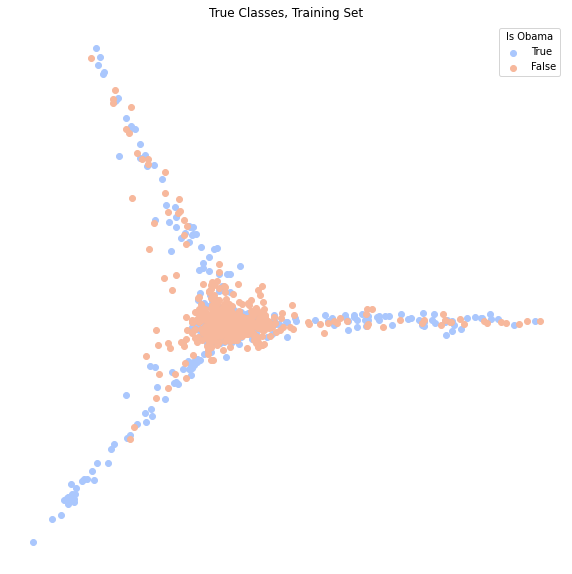

In [38]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot Obama
a = np.stack(train_data_df[train_data_df['category']]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "True")

#Plot not Obama
a = np.stack(train_data_df[train_data_df['category'].eq(False)]['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "False")
    
ax.legend(loc = 'upper right', title = 'Is Obama')
plt.title('True Classes, Training Set')
plt.show()

PCA cannot distinguish Obama very well. Let's perform a screeplot to see how many Principal Components we need.

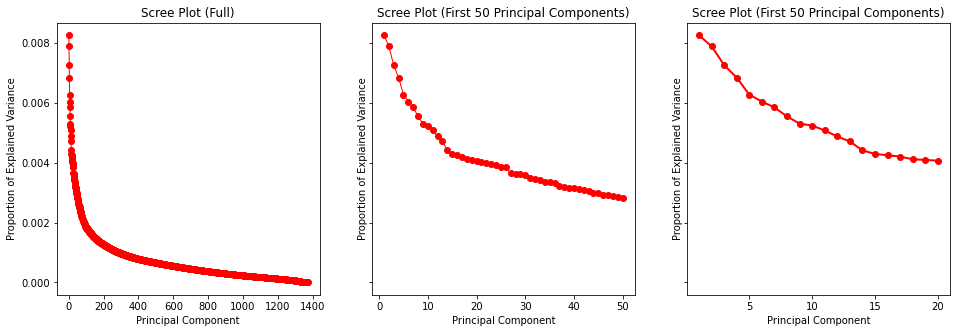

In [39]:
n = len(train_data_df)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(50) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 50 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(20) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

Let's choose the first 10 pricipal components as our covariates.

In [40]:
train_data_df['pca_reduced_10'] = train_data_df['pca'].apply(lambda x: x[:10])

Now we fit a logistic regression to our data.

In [41]:
logistic = sklearn.linear_model.LogisticRegression()
logistic.fit(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Let's see how the logistic regression performs on the training dataset from which we develop the model. Unfortunately, the mean accuracy is only about 64%.

In [42]:
logistic.score(np.stack(train_data_df['pca_reduced_10'], axis=0), train_data_df['category'])

0.6759124087591241

How does it perform on the testing dataset, which we "held out" and did not use for model training? We need to repeat all the steps on the testing data, but without retraining:

In [43]:
#Create vectors
TFVects_test = TFVectorizer.transform(test_data_df['text'].values.astype('U'))
test_data_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#PCA
reduced_data_test = pca.transform(np.stack(test_data_df['vect'], axis=0))
test_data_df['pca'] = [r for r in reduced_data_test]
test_data_df['pca_reduced_10'] = test_data_df['pca'].apply(lambda x: x[:10])

#Test
logistic.score(np.stack(test_data_df['pca_reduced_10'], axis=0), test_data_df['category'])

0.6228070175438597

Slightly poorer. How about using more dimensions (40)?

In [44]:
train_data_df['pca_reduced_40'] = train_data_df['pca'].apply(lambda x: x[:40])
test_data_df['pca_reduced_40'] = test_data_df['pca'].apply(lambda x: x[:40])

logistic.fit(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_40'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_40'], axis=0), test_data_df['category']))

Training:
0.7394160583941606
Testing:
0.6783625730994152


Or still more (100)?

In [45]:
train_data_df['pca_reduced_100'] = train_data_df['pca'].apply(lambda x: x[:100])
test_data_df['pca_reduced_100'] = test_data_df['pca'].apply(lambda x: x[:100])

logistic.fit(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_100'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_100'], axis=0), test_data_df['category']))

Training:
0.8167883211678832
Testing:
0.7573099415204678


Or even more (200)!

In [46]:
train_data_df['pca_reduced_200'] = train_data_df['pca'].apply(lambda x: x[:200])
test_data_df['pca_reduced_200'] = test_data_df['pca'].apply(lambda x: x[:200])

logistic.fit(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_200'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_200'], axis=0), test_data_df['category']))

Training:
0.8591240875912409
Testing:
0.7923976608187134


This is becoming ridiculous (400)!

In [47]:
train_data_df['pca_reduced_400'] = train_data_df['pca'].apply(lambda x: x[:400])
test_data_df['pca_reduced_400'] = test_data_df['pca'].apply(lambda x: x[:400])

logistic.fit(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category'])

print("Training:")
print(logistic.score(np.stack(train_data_df['pca_reduced_400'], axis=0), train_data_df['category']))
print("Testing:")
print(logistic.score(np.stack(test_data_df['pca_reduced_400'], axis=0), test_data_df['category']))

Training:
0.9102189781021898
Testing:
0.8157894736842105


Increasing the number of covariates would overfit our data, and it seems that using a logistic regression, our prediction accuracy is at best about 65%. We can, however, try a logistic regression that uses the TF-IDF scores for each word, but with an L1 regularization or L1-norm loss function, which is also known as least absolute deviations (LAD), least absolute errors (LAE) or L1 penalty. It minimizes the sum of the absolute differences (S) between the target value ($Y_i$) and the estimated values ($f(x_i)$) and prunes all insignificant variables (i.e., word TF-IDF scores):

$S=\sum^n_{i=1}|y_i=f(x_i)|$

The result is a model retaining only the most individually significant features.

In [48]:
logistic_l1= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_l1.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])
print(logistic_l1.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))

0.9613138686131387


Train the model using training data, and then test it on the testing data.

In [49]:
print(logistic_l1.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

0.8304093567251462


81% accuracy seems like the best we can get by using a logistic regression.

Now let's try with Naive Bayes. Classically, it is trained with word counts, but TF-IDF vectors are also quite good:

In [50]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(train_data_df['vect'], axis=0), train_data_df['category'])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [51]:
print("Training:")
print(naiveBayes.score(np.stack(train_data_df['vect'], axis=0), train_data_df['category']))
print("Testing:")
print(naiveBayes.score(np.stack(test_data_df['vect'], axis=0), test_data_df['category']))

Training:
0.9664233576642336
Testing:
0.8888888888888888


A bit better than the logit, but that's just looking at the accuracy. What about other measures? Let's first save the predictions in the dataframe to save use rerunning the model every time:

In [52]:
test_data_df['nb_predict'] = naiveBayes.predict(np.stack(test_data_df['vect'], axis=0))
test_data_df['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(test_data_df['vect'], axis=0))[:,0] #other is prop false

Precision:

In [53]:
sklearn.metrics.precision_score(test_data_df['category'], test_data_df['nb_predict'])

0.8791946308724832

Recall:

In [54]:
sklearn.metrics.recall_score(test_data_df['category'], test_data_df['nb_predict'])

0.8675496688741722

F1-measure:

In [55]:
sklearn.metrics.f1_score(test_data_df['category'], test_data_df['nb_predict'])

0.8733333333333334

Let's take a look at how well our posterior distribution looks relative to the truth.

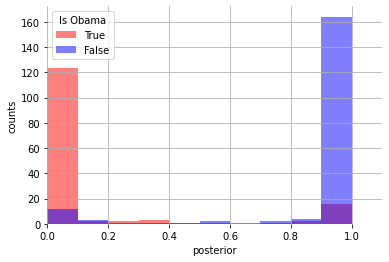

In [56]:
fig, ax = plt.subplots()
ax.grid(False)
ax.set_frame_on(False)
test_data_df[test_data_df['category'].eq(True)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'True', color = 'red')
test_data_df[test_data_df['category'].eq(False)]['nb_predict_prob_true'].hist(alpha = 0.5, ax = ax, bins = 10, label = 'False', color = 'blue')
ax.set_xlim((0,1.1))
ax.legend(title = "Is Obama")
ax.set_xlabel('posterior')
ax.set_ylabel('counts')
plt.show()

The classification is suprisingly accurate. We can even look at what words are most influential with a bit of simple math:

In [57]:
#Top indices
trueVals, falseVals = naiveBayes.feature_log_prob_

words_dict = {
    'Obama' : [],
    'Obama_log_prob' : [],
    'Clinton' : [],
    'Clinton_log_prob' : [],
}

for i, prob in sorted(enumerate(trueVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Obama'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Obama_log_prob'].append(prob)

for i, prob in sorted(enumerate(falseVals), key = lambda x:x[1], reverse=True)[:15]:
    words_dict['Clinton'].append(TFVectorizer.get_feature_names()[i])
    words_dict['Clinton_log_prob'].append(prob)
    
pandas.DataFrame(words_dict)

,Obama,Obama_log_prob,Clinton,Clinton_log_prob
0,welcomed,-2.285574,labolt,-1.770482
1,ground,-2.334967,dick,-1.813499
2,read,-2.334967,amy,-1.824549
3,announcement,-2.347706,brundage,-1.905518
4,urban,-2.360609,chicago,-2.075864
5,urging,-2.413955,temporary,-2.134704
6,class,-2.427748,location,-2.149972
7,fy,-2.427748,political,-2.213485
8,point,-2.427748,reform,-2.246822
9,construction,-2.455919,cases,-2.263916


## Multinomial Naive Bayes

What if we want to classify our text into one of *many* classes? The multinomial Naive Bayes generating model assumes that document features (e.g., words) are generated by draws from a multinomial distribution (recall this gives the probability to observe a particular pattern of counts across features). 

Let's explore this using the 20NG dataset, a scikit learn built in dataset which features 20 news categories.

In [58]:
from sklearn import datasets

In [59]:
newsgroups = sklearn.datasets.fetch_20newsgroups(data_home = '../data') #Free data to play with: documents from a newsgroup corpus.
newsgroups.target_names #Possible categories, i.e., the newsgroups

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

We can pick specific categories, and pull the relevant training and testing sets. 

In [60]:
target_categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics'] #Can change these of course

newsgroupsDF = pandas.DataFrame(columns = ['text', 'category', 'source_file'])
for category in target_categories:
    print("Loading data for: {}".format(category))
    ng = sklearn.datasets.fetch_20newsgroups(categories = [category], remove=['headers', 'footers', 'quotes'], data_home = '../data')
    newsgroupsDF = newsgroupsDF.append(pandas.DataFrame({'text' : ng.data, 'category' : [category] * len(ng.data), 'source_file' : ng.filenames}), ignore_index=True)

Loading data for: talk.religion.misc
Loading data for: soc.religion.christian
Loading data for: sci.space
Loading data for: comp.graphics


Now we need to tokenize, and make a training and testing set:

In [61]:
newsgroupsDF['tokenized_text'] = newsgroupsDF['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
newsgroupsDF['normalized_text'] = newsgroupsDF['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

In [62]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

In [63]:
print(len(train_ng_df))
print(len(test_ng_df))

1723
430


We need to extract features from the text. We can use built-in feature extraction to do so. We will use a tf-idf vectorizer, which converts the document into a vector of words with tf-idf weights (term-frequency inverse-document frequency). This gives high weight to words that show up a lot in a given document, but rarely across documents in the corpus (more distinctive). 

In [64]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

Now we can train the model:

In [65]:
MultinomialNB_ng = sklearn.naive_bayes.MultinomialNB()
MultinomialNB_ng.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

...and save predictions to the dataframe:

In [66]:
train_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(train_ng_df['vect'], axis=0))
print("Training score:")
print(MultinomialNB_ng.score(np.stack(train_ng_df['vect'], axis=0), train_ng_df['category']))

Training score:
0.897852582704585


In [67]:
train_ng_df[['category', 'nb_predict']][:10]

,category,nb_predict
879,soc.religion.christian,soc.religion.christian
1969,comp.graphics,comp.graphics
1734,comp.graphics,comp.graphics
390,soc.religion.christian,soc.religion.christian
504,soc.religion.christian,soc.religion.christian
1446,sci.space,sci.space
1358,sci.space,sci.space
1572,comp.graphics,comp.graphics
1111,sci.space,sci.space
969,soc.religion.christian,soc.religion.christian


Looks pretty good, lets examine the testing dataset:

In [68]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = MultinomialNB_ng.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(MultinomialNB_ng.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.7767441860465116


We can even use a confusion matrix, like we used last week for evaluating human coders relative to one another. Now we are evaluating our classifier relative to human coding. We'll just use the one in `lucem_illud_2020`, which requres a classifier and a dataframe with `'vect'` and `'category'` columns, like we have in the examples:

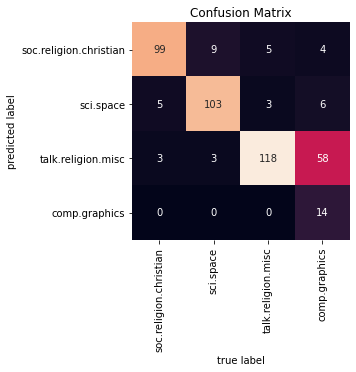

In [69]:
lucem_illud_2020.plotConfusionMatrix(MultinomialNB_ng, test_ng_df)

Let's calculate the precision, recall, and F-measures.

In [70]:
print(sklearn.metrics.precision_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #precision
print(sklearn.metrics.recall_score(test_ng_df['category'], test_ng_df['nb_predict'], average = 'weighted')) #recall

0.8266746173722918
0.7767441860465116


We can evaluate these per catagory. This has the same requiments as `plotConfusionMatrix`:

In [71]:
lucem_illud_2020.metrics.evaluateClassifier(MultinomialNB_ng, test_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
soc.religion.christian,0.167442,0.862991,0.648352,0.625791,0.936508
comp.graphics,0.060465,0.934753,0.846154,0.801495,0.925234
talk.religion.misc,0.158140,0.585366,1.000000,0.328871,0.170732
sci.space,0.060465,0.925604,0.880342,0.816387,0.895652


We can also plot the ROC curves. This has the same requiments as `plotConfusionMatrix`:

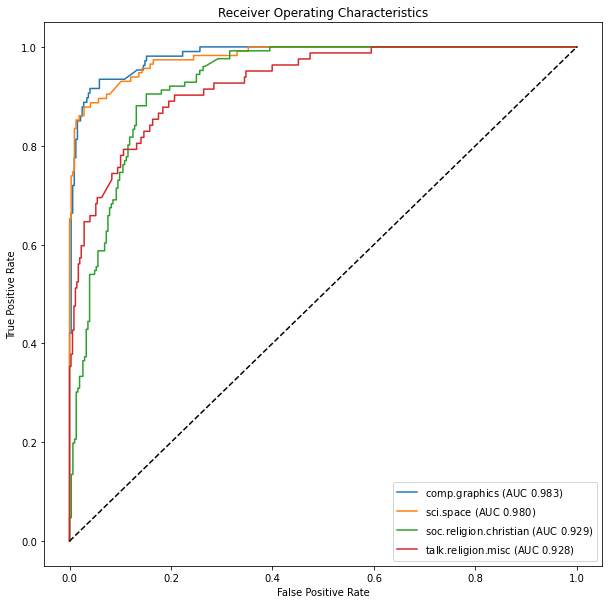

In [72]:
lucem_illud_2020.plotMultiROC(MultinomialNB_ng, test_ng_df)

And we can plot the PCA space visualization:

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

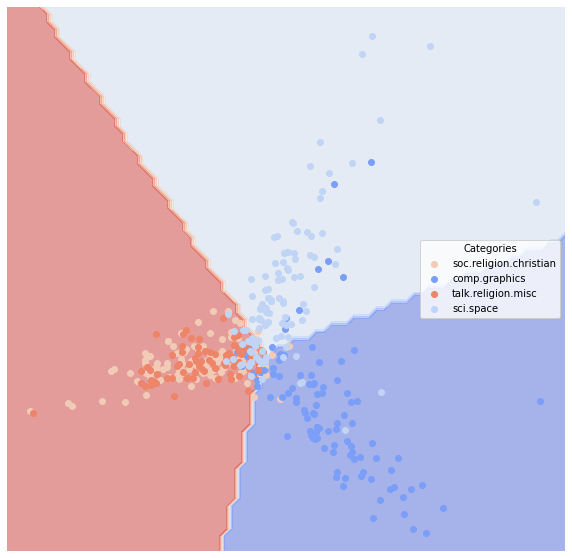

In [73]:
lucem_illud_2020.plotregions(MultinomialNB_ng, test_ng_df)

## <span style="color:red">*Exercise 2*</span>

<span style="color:red">In the cells immediately following, perform Logistic and Naïve Bayes classification (binary or multinomial) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project (e.g., these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week). Visualize the confusion matrix for training and testing sets. Calculate precision, recall, the F-measure, and AUC, then perform an ROC visualization. How do these classifiers perform? Exrapolate codes from these models to all uncoded data.


Here I want to explore the sentiment classes of reviews on movies on the IMDB platform.I get the coded data from Kaggle open source datasets, and the link is https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews. I get the uncoded data by web-crawling techniques. I crawled part of the reviews of all Oscat-nominated movies. The coded dataset will be split into training and testing data and the uncoded file will serve as extrapolation data.

Note: The coded dataset and uncoded dataset is too large. The coded data has 50,000 rows and the uncoded data has 84250 rows. For coding in my machine, I just used 10% of the original data.

In [74]:
# get datasets
coded_IMDB = pandas.read_csv('C:\\Users\\mac\\Desktop\\Content-Analysis-2020\\week-3\\IMDB_reviews\\coded_IMDB.csv')
uncoded_IMDB = pandas.read_csv('C:\\Users\\mac\\Desktop\\Content-Analysis-2020\\week-3\\IMDB_reviews\\uncoded_IMDB.txt')
coded_IMDB = coded_IMDB.sample(n = 4000,random_state = 0)
uncoded_IMDB = uncoded_IMDB[0:8425] #extrapolation data
xTrain, xTest, yTrain, yTest = sklearn.model_selection.train_test_split(coded_IMDB.iloc[:,0], coded_IMDB.iloc[:,1], 
                                                                        test_size = 0.2, random_state = 0)
coded_IMDB_train = pandas.DataFrame({'review':xTrain,'sentiment':yTrain}) #train data
coded_IMDB_test = pandas.DataFrame({'review':xTest,'sentiment':yTest}) #test data

### Logistic regression

In [75]:
# Process training data
TFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects = TFVectorizer.fit_transform(coded_IMDB_train['review'])
coded_IMDB_train['vect'] = [np.array(v).flatten() for v in TFVects.todense()]
pca = sklearn.decomposition.PCA()
reduced_data = pca.fit_transform(np.stack(coded_IMDB_train['vect'], axis=0))
coded_IMDB_train['pca'] = [r for r in reduced_data]
# Process testing data
TFVects_test = TFVectorizer.transform(coded_IMDB_test['review'])
coded_IMDB_test['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]
reduced_data_test = pca.transform(np.stack(coded_IMDB_test['vect'], axis=0))
coded_IMDB_test['pca'] = [r for r in reduced_data_test]

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


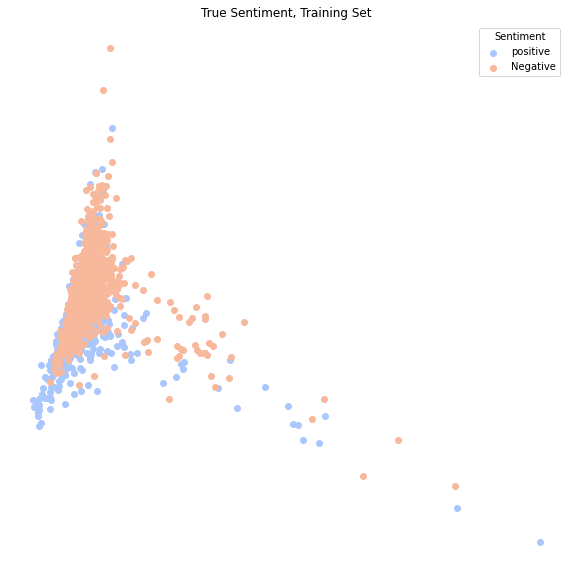

In [76]:
fig, ax = plt.subplots(figsize = (10,10))
ax.axis('off')
pallet = seaborn.color_palette(palette='coolwarm', n_colors = 2)

#Plot postive reviews
a = np.stack(coded_IMDB_train[coded_IMDB_train['sentiment'] == 'positive']['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[0], label = "positive")

#Plot negative reviews
a = np.stack(coded_IMDB_train[coded_IMDB_train['sentiment'] == 'negative']['pca'])
ax.scatter(a[:,0], a[:, 1], c = pallet[1], label = "Negative")
    
ax.legend(loc = 'upper right', title = 'Sentiment')
plt.title('True Sentiment, Training Set')
plt.show()

In this case, we can see that with all the principle components PCA can not distinguish the sentiment very well. Therefore, I decide to change the number of selected principle components.

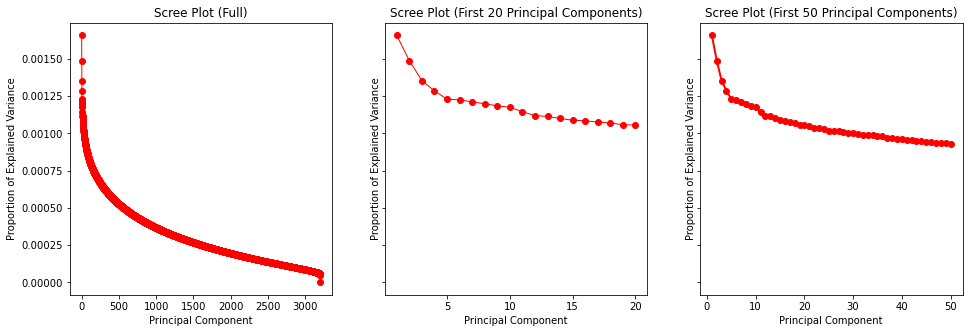

In [77]:
n = len(coded_IMDB_train)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize = (16, 5), sharey=True)

eigen_vals = np.arange(n) + 1
ax1.plot(eigen_vals, pca.explained_variance_ratio_, 'ro-', linewidth=1)
ax1.set_title('Scree Plot (Full)')
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Proportion of Explained Variance')

eigen_vals = np.arange(20) + 1
ax2.plot(eigen_vals, pca.explained_variance_ratio_[:20], 'ro-', linewidth=1)
ax2.set_title('Scree Plot (First 20 Principal Components)')
ax2.set_xlabel('Principal Component')
ax2.set_ylabel('Proportion of Explained Variance')


eigen_vals = np.arange(50) + 1
ax3.plot(eigen_vals, pca.explained_variance_ratio_[:50], 'ro-', linewidth=2)
ax3.set_title('Scree Plot (First 50 Principal Components)')
ax3.set_xlabel('Principal Component')
ax3.set_ylabel('Proportion of Explained Variance')

plt.show()

According to the observation from the above plots, we intuitively want to choose the first 5 pricipal components as our covariates.However, this may not be the best. Therefore, we can choose 5, 20, 50, 100, 200 and 500 and compare the results.

In [78]:
coded_IMDB_train['pca_reduced_5'] = coded_IMDB_train['pca'].apply(lambda x: x[:5])
coded_IMDB_train['pca_reduced_20'] = coded_IMDB_train['pca'].apply(lambda x: x[:20])
coded_IMDB_train['pca_reduced_50'] = coded_IMDB_train['pca'].apply(lambda x: x[:50])
coded_IMDB_train['pca_reduced_100'] = coded_IMDB_train['pca'].apply(lambda x: x[:200])
coded_IMDB_train['pca_reduced_500'] = coded_IMDB_train['pca'].apply(lambda x: x[:500])
coded_IMDB_test['pca_reduced_5'] = coded_IMDB_test['pca'].apply(lambda x: x[:5])
coded_IMDB_test['pca_reduced_20'] = coded_IMDB_test['pca'].apply(lambda x: x[:20])
coded_IMDB_test['pca_reduced_50'] = coded_IMDB_test['pca'].apply(lambda x: x[:50])
coded_IMDB_test['pca_reduced_100'] = coded_IMDB_test['pca'].apply(lambda x: x[:200])
coded_IMDB_test['pca_reduced_500'] = coded_IMDB_test['pca'].apply(lambda x: x[:500])

In [79]:
pca_lists = ['pca_reduced_5','pca_reduced_20','pca_reduced_50','pca_reduced_100','pca_reduced_500']
logistic_scores = {'principle components':[5,20,50,100,500],'training score':[],'testing score':[]}
for pca_list in pca_lists:
    logistic = sklearn.linear_model.LogisticRegression()
    logistic.fit(np.stack(coded_IMDB_train[pca_list], axis=0), coded_IMDB_train['sentiment'])
    training_score = logistic.score(np.stack(coded_IMDB_train[pca_list], axis=0), coded_IMDB_train['sentiment'])
    testing_score = logistic.score(np.stack(coded_IMDB_test[pca_list], axis=0), coded_IMDB_test['sentiment'])
    logistic_scores['training score'].append(training_score)
    logistic_scores['testing score'].append(testing_score)
logistic_scores

{'principle components': [5, 20, 50, 100, 500],
 'training score': [0.7040625, 0.7603125, 0.775625, 0.819375, 0.8534375],
 'testing score': [0.73375, 0.76375, 0.7875, 0.7975, 0.8125]}

The following figure is the confusion matrix for training dataset.

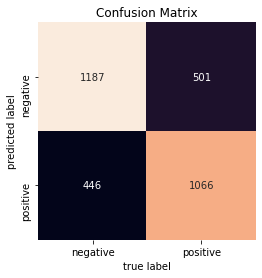

In [80]:
coded_IMDB_5_components_train = coded_IMDB_train.copy()
coded_IMDB_5_components_train['category'] = coded_IMDB_5_components_train['sentiment']
coded_IMDB_5_components_train['vect'] = coded_IMDB_5_components_train['pca_reduced_5']
logistic_5_components = sklearn.linear_model.LogisticRegression()
logistic_5_components.fit(np.stack(coded_IMDB_5_components_train['vect'], axis=0), coded_IMDB_5_components_train['category'])
lucem_illud_2020.plotConfusionMatrix(logistic_5_components, coded_IMDB_5_components_train)

The following figure is the confusion matrix for testing dataset.

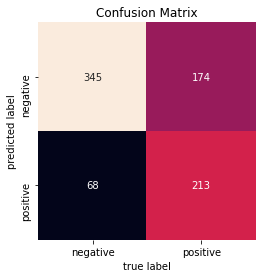

In [81]:
coded_IMDB_5_components_test = coded_IMDB_test.copy()
coded_IMDB_5_components_test['category'] = coded_IMDB_5_components_test['sentiment']
coded_IMDB_5_components_test['vect'] = coded_IMDB_5_components_test['pca_reduced_5']
logistic_5_components = sklearn.linear_model.LogisticRegression()
logistic_5_components.fit(np.stack(coded_IMDB_5_components_test['vect'], axis=0), coded_IMDB_5_components_test['category'])
lucem_illud_2020.plotConfusionMatrix(logistic_5_components, coded_IMDB_5_components_test)

We can see that when we choose 5 principle components, the accuracy score of training test is 70.41% and 73.375% in testing data.Using this algorithm, we plotted the corresponding confusion matrix on training and testing datasets.

We also want to know whether the algorithm performance will be better if we try a logistic regression that uses the TF-IDF scores for each word. 

In [84]:
logistic_imdb= sklearn.linear_model.LogisticRegression(penalty='l2')
logistic_imdb.fit(np.stack(coded_IMDB_train['vect'], axis=0), coded_IMDB_train['sentiment'])
print('training: ', logistic_imdb.score(np.stack(coded_IMDB_train['vect'], axis=0), coded_IMDB_train['sentiment']))
print('testing: ', logistic_imdb.score(np.stack(coded_IMDB_test['vect'], axis=0), coded_IMDB_test['sentiment']))

training:  0.975625
testing:  0.82375


According to the accuracy scores, we can see that a logistic regression that uses TF-IDF scores for each word is better in this case. Therefore we use this model on the extrapolation dataset.

In [85]:
# Process the extrapolation data
TFVects_uncoded = TFVectorizer.transform(uncoded_IMDB['reviews_words'])
uncoded_IMDB['vect'] = [np.array(v).flatten() for v in TFVects_uncoded.todense()]

In [86]:
uncoded_IMDB['sentiment_logistic'] = logistic_imdb.predict(np.stack(uncoded_IMDB['vect'], axis=0))
uncoded_IMDB

,movie_name,review_title,review_time,reviews_words,vect,sentiment_logistic
0,Cover Girl (1944),Gene Kelly's pivotal role and Rita Hayworth's...,7 March 2003,Cover Girl's importance lies not in its origin...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
1,Cover Girl (1944),Put To The Test And Passes With Flying Colors\n,3 February 2007,It took a loan out film to Columbia for Gene K...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
2,Cover Girl (1944),Energetic and Fun\n,19 April 2004,"For a non-MGM musical from the 1940s, this is ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
3,Cover Girl (1944),An Extravaganza of Music and A Good Story too!\n,28 March 2002,A good story about Rusty Parker (Rita Hayworth...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
4,Cover Girl (1944),Cover Girl Shines\n,14 November 2003,"""Cover Girl"" is the best musical Rita Hayworth...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
...,...,...,...,...,...,...
8420,Take the High Ground! (1953),Two Combat Veterans Lead New Recruits Through...,7 August 2010,The staple of war movies is the Basic Training...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
8421,Take the High Ground! (1953),Basic training during Korean war with a stell...,26 June 2010,This is an overlooked military film about basi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
8422,Take the High Ground! (1953),Straightforward story of one Sergeant's missi...,30 December 2004,(No spoilers in this first paragraph.) The mov...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive
8423,Take the High Ground! (1953),Uninspiring\n,7 August 2016,"All things considered there's nothing ""wrong"" ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


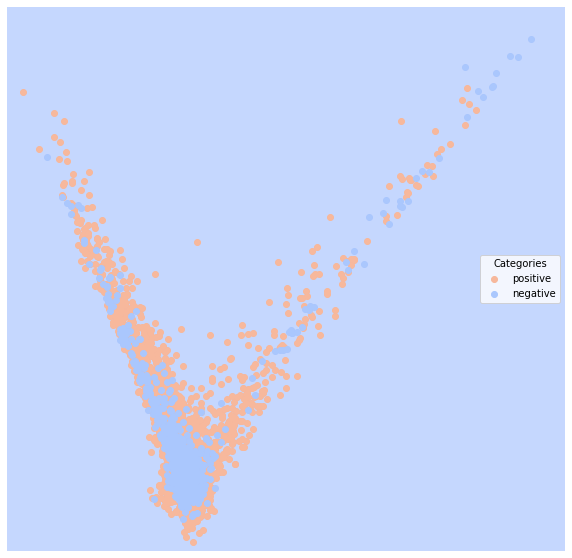

In [87]:
uncoded_IMDB['category'] = uncoded_IMDB['sentiment_logistic']
lucem_illud_2020.plotregions(logistic_imdb, uncoded_IMDB)

### Naïve Bayes classification

Note: Since the sentiment only has two classes, we choose binary naïve Bayes classification.

Accuracy Scores:

In [88]:
coded_IMDB_train_bayes = coded_IMDB_train.copy()
coded_IMDB_test_bayes = coded_IMDB_test.copy()
coded_IMDB_train_bayes['category'] = coded_IMDB_train_bayes['sentiment']
coded_IMDB_test_bayes['category'] = coded_IMDB_test_bayes['sentiment']

In [89]:
naiveBayes = sklearn.naive_bayes.BernoulliNB()
naiveBayes.fit(np.stack(coded_IMDB_train_bayes['vect'], axis=0), coded_IMDB_train_bayes['sentiment'])
print("Training:")
print(naiveBayes.score(np.stack(coded_IMDB_train_bayes['vect'], axis=0), coded_IMDB_train_bayes['sentiment']))
print("Testing:")
print(naiveBayes.score(np.stack(coded_IMDB_test_bayes['vect'], axis=0), coded_IMDB_test_bayes['sentiment']))

Training:
0.91875
Testing:
0.7575


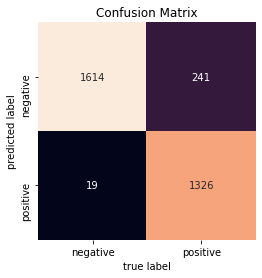

In [90]:
lucem_illud_2020.plotConfusionMatrix(naiveBayes, coded_IMDB_train_bayes)

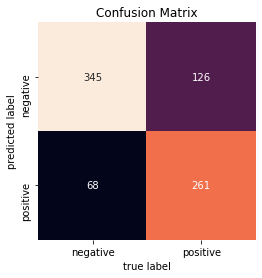

In [91]:
lucem_illud_2020.plotConfusionMatrix(naiveBayes, coded_IMDB_test_bayes)

According to the accuracy scores and confusion matrix figures, we can see that Naïve Bayes classification in this case performs worse than the best logistic regression that we trained previously. In the following steps, we will calculate other measurement scores.

In [92]:
coded_IMDB_train_bayes['nb_predict'] = naiveBayes.predict(np.stack(coded_IMDB_train_bayes['vect'], axis=0))
coded_IMDB_train_bayes['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(coded_IMDB_train_bayes['vect'], axis=0))[:,0]
coded_IMDB_test_bayes['nb_predict'] = naiveBayes.predict(np.stack(coded_IMDB_test_bayes['vect'], axis=0))
coded_IMDB_test_bayes['nb_predict_prob_true'] = naiveBayes.predict_proba(np.stack(coded_IMDB_test_bayes['vect'], axis=0))[:,0]

#### Precision

In [93]:
print('Training:')
print(sklearn.metrics.precision_score(coded_IMDB_train_bayes['category'], coded_IMDB_train_bayes['nb_predict'],pos_label="positive"))
print('Testing:')
print(sklearn.metrics.precision_score(coded_IMDB_test_bayes['category'], coded_IMDB_test_bayes['nb_predict'],pos_label="positive"))

Training:
0.9858736059479554
Testing:
0.7933130699088146


#### Recall

In [94]:
print('Training:')
print(sklearn.metrics.recall_score(coded_IMDB_train_bayes['category'], coded_IMDB_train_bayes['nb_predict'],pos_label="positive"))
print('Testing:')
print(sklearn.metrics.recall_score(coded_IMDB_test_bayes['category'], coded_IMDB_test_bayes['nb_predict'],pos_label="positive"))

Training:
0.8462029355456286
Testing:
0.6744186046511628


#### F1-measure

In [95]:
print('Training:')
print(sklearn.metrics.f1_score(coded_IMDB_train_bayes['category'], coded_IMDB_train_bayes['nb_predict'],pos_label="positive"))
print('Testing:')
print(sklearn.metrics.f1_score(coded_IMDB_test_bayes['category'], coded_IMDB_test_bayes['nb_predict'],pos_label="positive"))

Training:
0.9107142857142857
Testing:
0.729050279329609


#### AUC (together with other measures)

In [96]:
# Training
lucem_illud_2020.metrics.evaluateClassifier(naiveBayes, coded_IMDB_train_bayes)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
positive,0.08125,0.917284,0.985874,0.909562,0.846203
negative,0.08125,0.917284,0.870081,0.865895,0.988365


In [97]:
# Testing
lucem_illud_2020.metrics.evaluateClassifier(naiveBayes, coded_IMDB_test_bayes)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
positive,0.2425,0.754885,0.793313,0.692525,0.674419
negative,0.2425,0.754885,0.732484,0.696881,0.835351


#### ROC

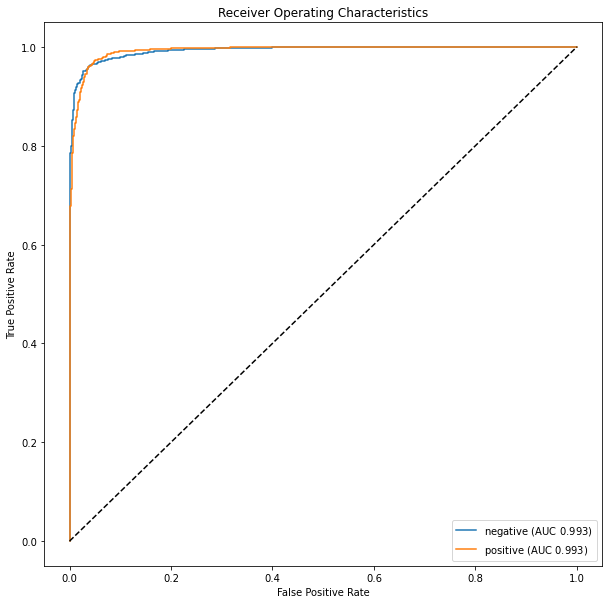

In [98]:
# Training
lucem_illud_2020.plotMultiROC(naiveBayes, coded_IMDB_train_bayes)

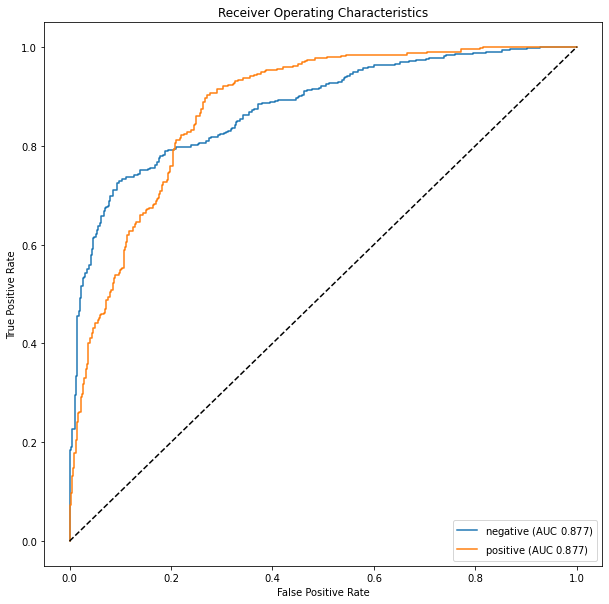

In [99]:
# Testing
lucem_illud_2020.plotMultiROC(naiveBayes, coded_IMDB_test_bayes)

Also, we are able to get PCA classfication results by Naive Bayes classifier.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


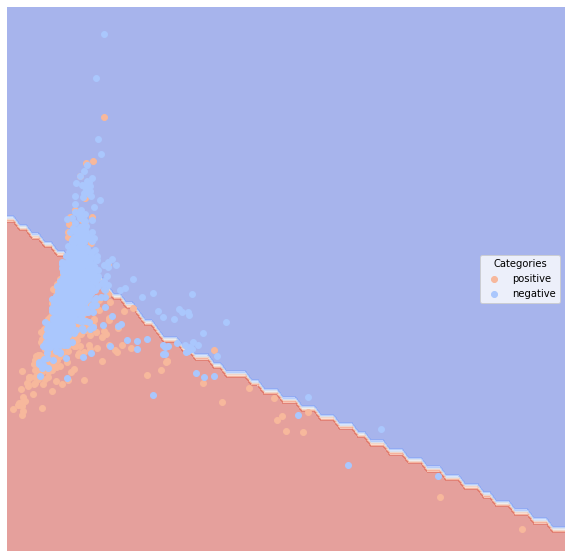

In [100]:
# Training
lucem_illud_2020.plotregions(naiveBayes, coded_IMDB_train_bayes)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


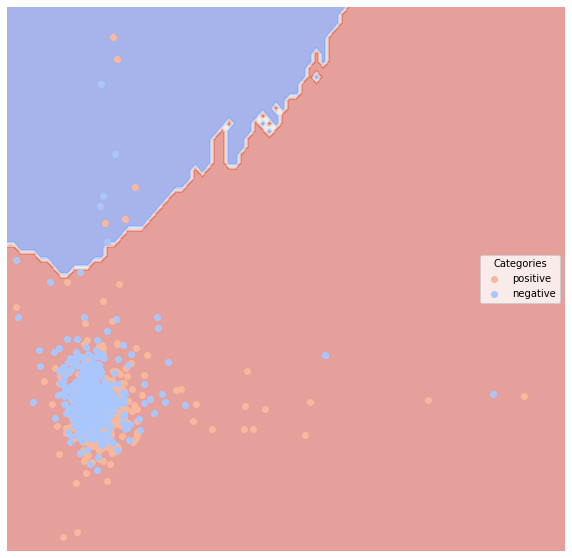

In [101]:
# Testing
lucem_illud_2020.plotregions(naiveBayes, coded_IMDB_test_bayes)

Finally, we run this algorithm on the uncoded dataset.

In [102]:
uncoded_IMDB['sentiment_naivebayes'] = naiveBayes.predict(np.stack(uncoded_IMDB['vect'], axis=0))
uncoded_IMDB

,movie_name,review_title,review_time,reviews_words,vect,sentiment_logistic,category,sentiment_naivebayes
0,Cover Girl (1944),Gene Kelly's pivotal role and Rita Hayworth's...,7 March 2003,Cover Girl's importance lies not in its origin...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive
1,Cover Girl (1944),Put To The Test And Passes With Flying Colors\n,3 February 2007,It took a loan out film to Columbia for Gene K...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive
2,Cover Girl (1944),Energetic and Fun\n,19 April 2004,"For a non-MGM musical from the 1940s, this is ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive
3,Cover Girl (1944),An Extravaganza of Music and A Good Story too!\n,28 March 2002,A good story about Rusty Parker (Rita Hayworth...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive
4,Cover Girl (1944),Cover Girl Shines\n,14 November 2003,"""Cover Girl"" is the best musical Rita Hayworth...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive
...,...,...,...,...,...,...,...,...
8420,Take the High Ground! (1953),Two Combat Veterans Lead New Recruits Through...,7 August 2010,The staple of war movies is the Basic Training...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive
8421,Take the High Ground! (1953),Basic training during Korean war with a stell...,26 June 2010,This is an overlooked military film about basi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive
8422,Take the High Ground! (1953),Straightforward story of one Sergeant's missi...,30 December 2004,(No spoilers in this first paragraph.) The mov...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive
8423,Take the High Ground! (1953),Uninspiring\n,7 August 2016,"All things considered there's nothing ""wrong"" ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,negative


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


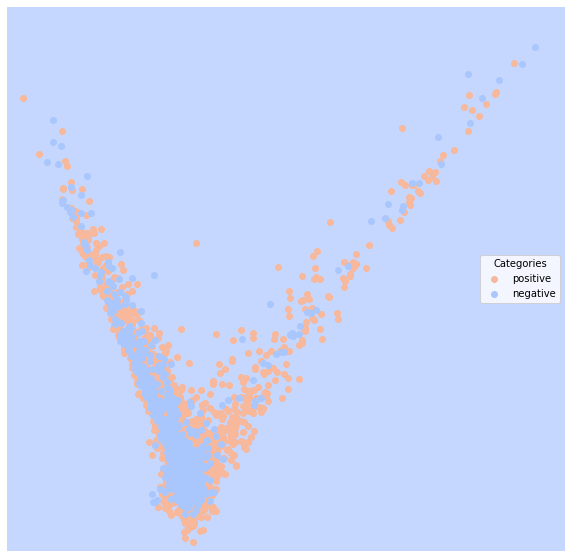

In [103]:
uncoded_IMDB['category'] = uncoded_IMDB['sentiment_naivebayes']
lucem_illud_2020.plotregions(naiveBayes, uncoded_IMDB)

# Decision Trees

Decision trees can be used to predict both categorical/class labels (i.e., classification) and continuous labels (i.e., regression).

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

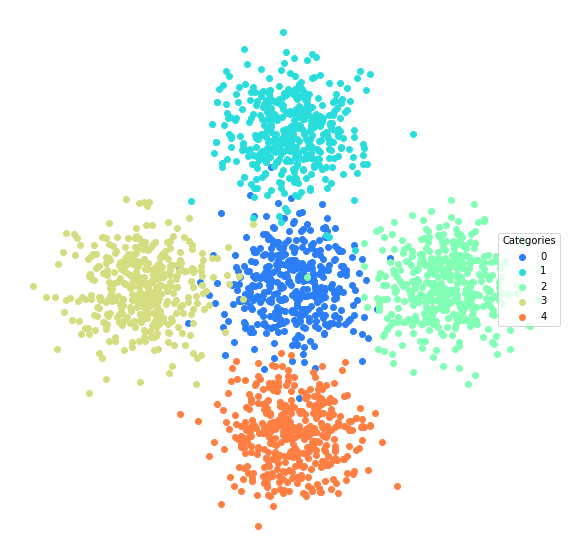

In [104]:
blobs_df = lucem_illud_2020.multiBlobs(noise=.2, centers=[(0,0), (0,5), (5,0), (-5,0), (0,-5)])
df_exampleTree_train, df_exampleTree_test = lucem_illud_2020.trainTestSplit(blobs_df)
lucem_illud_2020.plotter(df_exampleTree_train)

Now we import our Decision Tree classifier from sklearn.tree (familiar syntax) and fit it using the fit method.

In [105]:
clf_tree = sklearn.tree.DecisionTreeClassifier(max_depth=4,random_state=0)
clf_tree.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

To see what's going on visually with the classification: 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

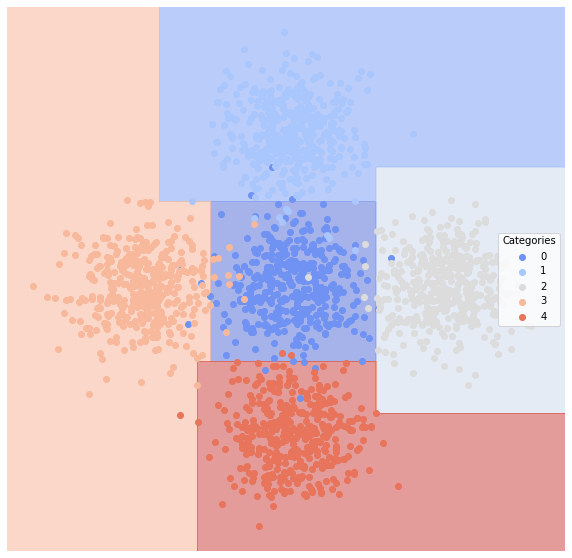

In [106]:
lucem_illud_2020.plotregions(clf_tree, df_exampleTree_train)

In [107]:
lucem_illud_2020.evaluateClassifier(clf_tree, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.038,0.964457,0.851852,0.830951,0.968421
1,0.006,0.984694,1.000000,0.975388,0.969388
2,0.006,0.984536,1.000000,0.975072,0.969072
3,0.012,0.976192,0.990654,0.956030,0.954955
4,0.014,0.972254,0.979167,0.939714,0.949495


Let's look at accuracy:

In [108]:
sklearn.metrics.accuracy_score(df_exampleTree_test['category'],clf_tree.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))

0.962

What happens if we trim the tree?

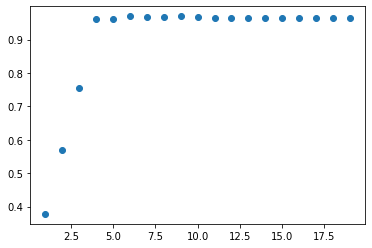

In [109]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree2 = sklearn.tree.DecisionTreeClassifier(max_depth=i,random_state=0)
    tree2.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category'])
    score = sklearn.metrics.accuracy_score(df_exampleTree_test['category'], tree2.predict(np.stack(df_exampleTree_test['vect'], axis = 0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

We can select different layers of the decision tree or "prune" it. At approximately four layers down in the decision tree, the shape is somewhat odd, suggesting that our model is overfitting beyond those four layers.

Combining multiple overfitting estimators turns out to be a key idea in machine learning. This is called **bagging** and is a type of **ensemble** method. The idea is to make many randomized estimators--each can overfit, as decision trees are wont to do--but then to combine them, ultimately producing a better classification. A **random forest** is produced by bagging decision trees.

In [110]:
tree = sklearn.tree.DecisionTreeClassifier(max_depth=10) #Create an instance of our decision tree classifier.

bag = sklearn.ensemble.BaggingClassifier(tree, n_estimators=100, max_samples=0.8, random_state=1) #Each tree uses up to 80% of the data

In [111]:
bag.fit(np.stack(df_exampleTree_train['vect'], axis =0), df_exampleTree_train['category']) #Fit the bagged classifier

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

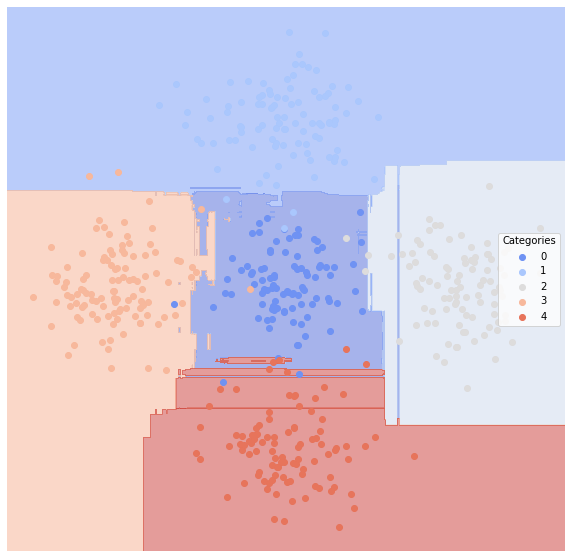

In [112]:
lucem_illud_2020.plotregions(bag, df_exampleTree_test)

In [113]:
lucem_illud_2020.evaluateClassifier(bag, df_exampleTree_test)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
0,0.030,0.965367,0.892157,0.862592,0.957895
1,0.010,0.982206,0.979381,0.955400,0.969388
2,0.006,0.984536,1.000000,0.975072,0.969072
3,0.010,0.980697,0.990741,0.963038,0.963964
4,0.012,0.981108,0.969697,0.946312,0.969697


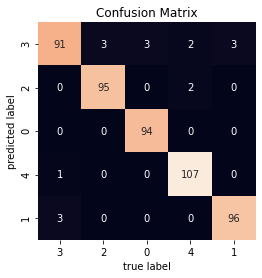

In [114]:
lucem_illud_2020.plotConfusionMatrix(bag, df_exampleTree_test)

## <span style="color:red">*Exercise 3*</span>

<span style="color:red">In the cells immediately following, perform decision tree and random forest classification (binary, multinomial or continuous) using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. As with ***Exercise 2***, these could be crowd-sourced codes gathered through Amazon Mechanical Turk last week. Visualize the classification of data points. Calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Now build an ensemble classifier by bagging trees into a random forest. Visualize the result. How do these classifiers perform? What does ensemble learning do?

### Decision tree

In [117]:
coded_IMDB_train['category'] = coded_IMDB_train['sentiment']
clf_tree_imdb = sklearn.tree.DecisionTreeClassifier(max_depth=5,random_state=0)
clf_tree_imdb.fit(np.stack(coded_IMDB_train['vect'], axis =0), coded_IMDB_train['category'])

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


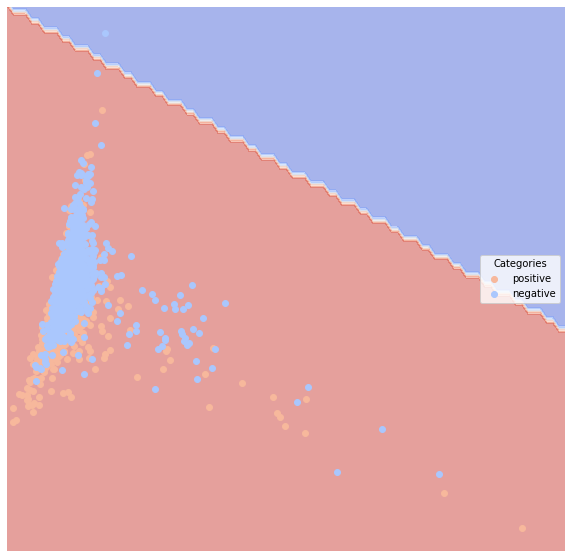

In [118]:
# Tree visualization
# Training
lucem_illud_2020.plotregions(clf_tree_imdb, coded_IMDB_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


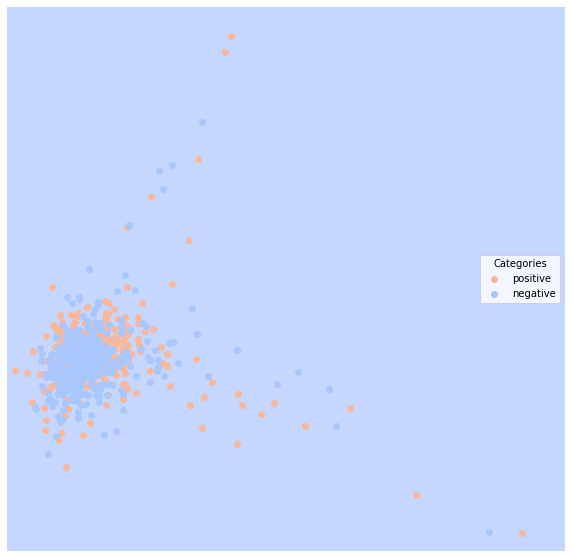

In [120]:
# Testing
coded_IMDB_test['category'] = coded_IMDB_test['sentiment']
lucem_illud_2020.plotregions(clf_tree_imdb, coded_IMDB_test)

Now we can see the relevant metrics.

In [121]:
# Training
train_dt_scores = lucem_illud_2020.evaluateClassifier(clf_tree_imdb, coded_IMDB_train)
train_dt_scores['Accuracy_Score'] = 1 - train_dt_scores['Error_Rate']
train_dt_scores

,Error_Rate,AUC,Precision,Average_Precision,Recall,Accuracy_Score
Category,,,,,,
positive,0.431562,0.576849,0.532069,0.531420,0.984684,0.568438
negative,0.431562,0.576849,0.920000,0.579555,0.169014,0.568438


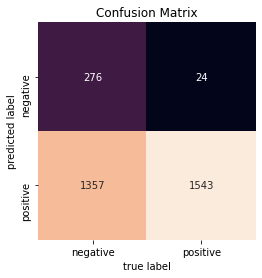

In [122]:
lucem_illud_2020.plotConfusionMatrix(clf_tree_imdb, coded_IMDB_train)

In [123]:
# Testing
coded_IMDB_test['category'] = coded_IMDB_test['sentiment']
test_dt_scores = lucem_illud_2020.evaluateClassifier(clf_tree_imdb, coded_IMDB_test)
test_dt_scores['Accuracy_Score'] = 1 - test_dt_scores['Error_Rate']
test_dt_scores

,Error_Rate,AUC,Precision,Average_Precision,Recall,Accuracy_Score
Category,,,,,,
positive,0.45,0.563433,0.518519,0.517710,0.976744,0.55
negative,0.45,0.563433,0.873239,0.569842,0.150121,0.55


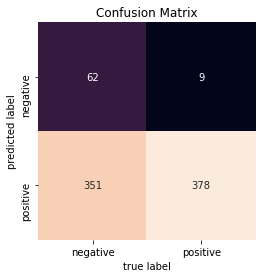

In [124]:
lucem_illud_2020.plotConfusionMatrix(clf_tree_imdb, coded_IMDB_test)

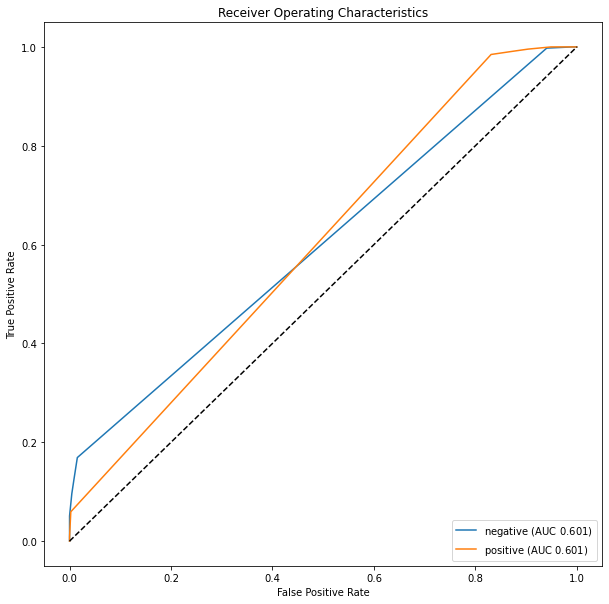

In [125]:
# ROC - training
lucem_illud_2020.plotMultiROC(clf_tree_imdb, coded_IMDB_train)

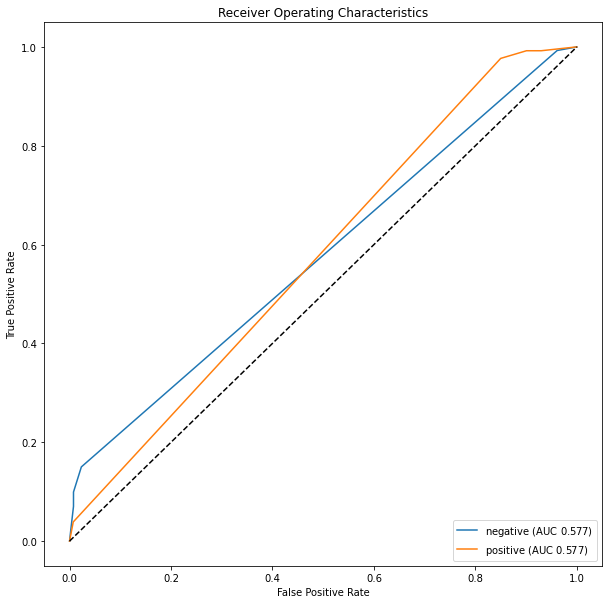

In [126]:
# ROC - testing
lucem_illud_2020.plotMultiROC(clf_tree_imdb, coded_IMDB_test)

Also we predict the uncoded dataset.

In [127]:
uncoded_IMDB['sentiment_dt'] = clf_tree_imdb.predict(np.stack(uncoded_IMDB['vect'], axis=0))
uncoded_IMDB

,movie_name,review_title,review_time,reviews_words,vect,sentiment_logistic,category,sentiment_naivebayes,sentiment_dt
0,Cover Girl (1944),Gene Kelly's pivotal role and Rita Hayworth's...,7 March 2003,Cover Girl's importance lies not in its origin...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive
1,Cover Girl (1944),Put To The Test And Passes With Flying Colors\n,3 February 2007,It took a loan out film to Columbia for Gene K...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive
2,Cover Girl (1944),Energetic and Fun\n,19 April 2004,"For a non-MGM musical from the 1940s, this is ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive
3,Cover Girl (1944),An Extravaganza of Music and A Good Story too!\n,28 March 2002,A good story about Rusty Parker (Rita Hayworth...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,negative
4,Cover Girl (1944),Cover Girl Shines\n,14 November 2003,"""Cover Girl"" is the best musical Rita Hayworth...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive
...,...,...,...,...,...,...,...,...,...
8420,Take the High Ground! (1953),Two Combat Veterans Lead New Recruits Through...,7 August 2010,The staple of war movies is the Basic Training...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive
8421,Take the High Ground! (1953),Basic training during Korean war with a stell...,26 June 2010,This is an overlooked military film about basi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive
8422,Take the High Ground! (1953),Straightforward story of one Sergeant's missi...,30 December 2004,(No spoilers in this first paragraph.) The mov...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive
8423,Take the High Ground! (1953),Uninspiring\n,7 August 2016,"All things considered there's nothing ""wrong"" ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,negative,negative,positive


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


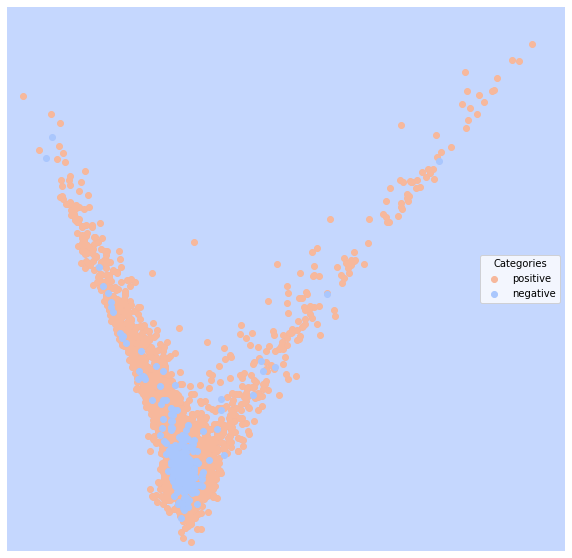

In [128]:
uncoded_IMDB['category'] = uncoded_IMDB['sentiment_dt']
lucem_illud_2020.plotregions(clf_tree_imdb, uncoded_IMDB)

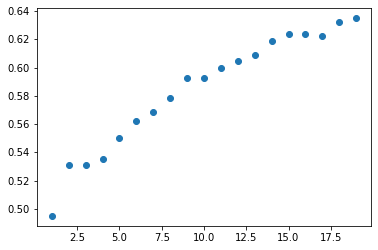

In [129]:
depthvec = []
scorevec = []
for i in range(1,20):
    tree = sklearn.tree.DecisionTreeClassifier(max_depth=i, random_state=0)
    tree.fit(np.stack(coded_IMDB_train['vect'], axis=0), coded_IMDB_train['category'])
    score = sklearn.metrics.accuracy_score(coded_IMDB_test['category'], tree.predict(np.stack(coded_IMDB_test['vect'], axis=0)))
    depthvec.append(i)
    scorevec.append(score)
plt.scatter(depthvec,scorevec)
plt.show()

I also try to see whether there exists the problem of overfitting. However, as the figure shows, the performance keeps improving when the max depth(under 20) increases.Considering this, I predict that the bagging method who has regularization will perform better.

### random forest classification

In [130]:
rf_imdb = sklearn.ensemble.RandomForestClassifier()
rf_imdb.fit(np.stack(coded_IMDB_train['vect'], axis =0), coded_IMDB_train['category'])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


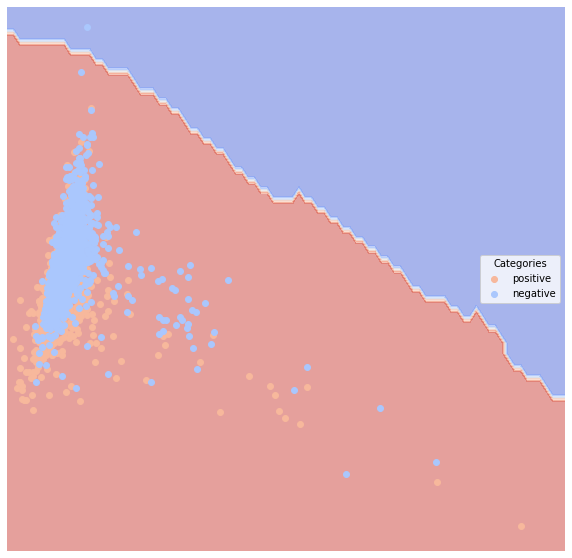

In [131]:
# Tree visualization
# Training
lucem_illud_2020.plotregions(rf_imdb, coded_IMDB_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


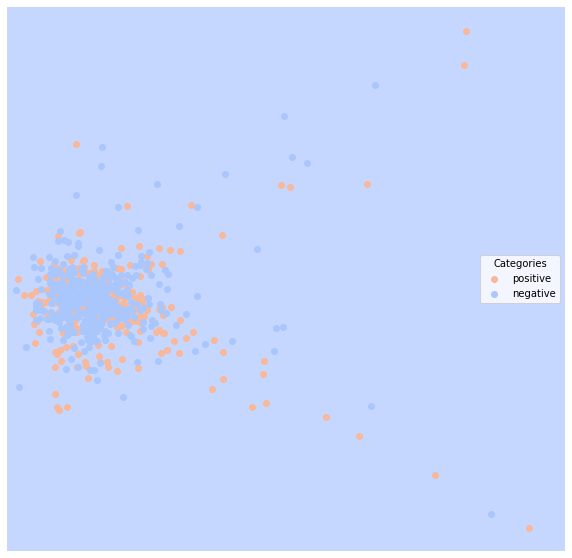

In [132]:
# Testing
lucem_illud_2020.plotregions(rf_imdb, coded_IMDB_test)

Now we can see the relevant metrics.

In [133]:
# Training
train_rf_scores = lucem_illud_2020.evaluateClassifier(rf_imdb, coded_IMDB_train)
train_rf_scores['Accuracy_Score'] = 1 - train_rf_scores['Error_Rate']
train_rf_scores

,Error_Rate,AUC,Precision,Average_Precision,Recall,Accuracy_Score
Category,,,,,,
positive,0.0,1.0,1.0,1.0,1.0,1.0
negative,0.0,1.0,1.0,1.0,1.0,1.0


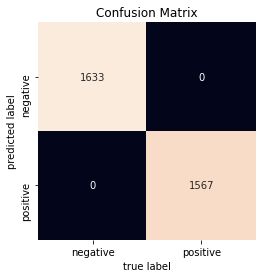

In [134]:
lucem_illud_2020.plotConfusionMatrix(rf_imdb, coded_IMDB_train)

It is astonishing that the algorithm achieves 100% correct in classfiying the training dataset. We need to see whether this algorithm is overfitting.

In [135]:
# Testing
test_rf_scores = lucem_illud_2020.evaluateClassifier(rf_imdb, coded_IMDB_test)
test_rf_scores['Accuracy_Score'] = 1 - test_rf_scores['Error_Rate']
test_rf_scores

,Error_Rate,AUC,Precision,Average_Precision,Recall,Accuracy_Score
Category,,,,,,
positive,0.19125,0.810622,0.767123,0.729780,0.868217,0.80875
negative,0.19125,0.810622,0.859116,0.774437,0.753027,0.80875


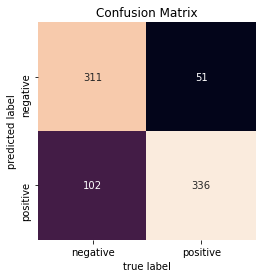

In [136]:
lucem_illud_2020.plotConfusionMatrix(rf_imdb, coded_IMDB_test)

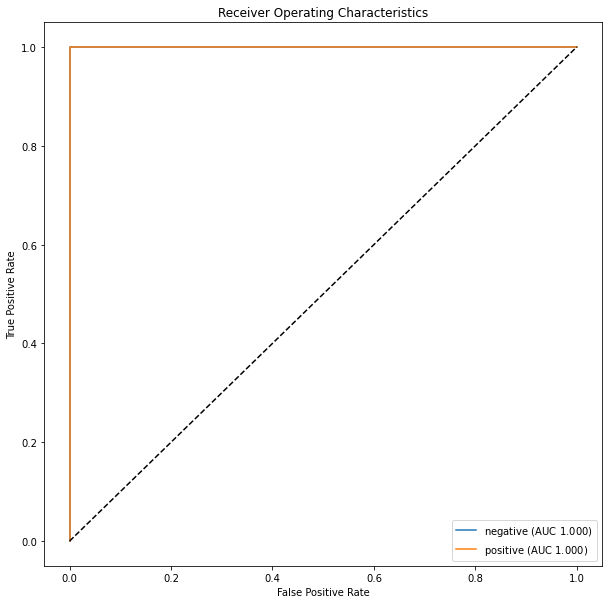

In [137]:
# ROC - training
lucem_illud_2020.plotMultiROC(rf_imdb, coded_IMDB_train)

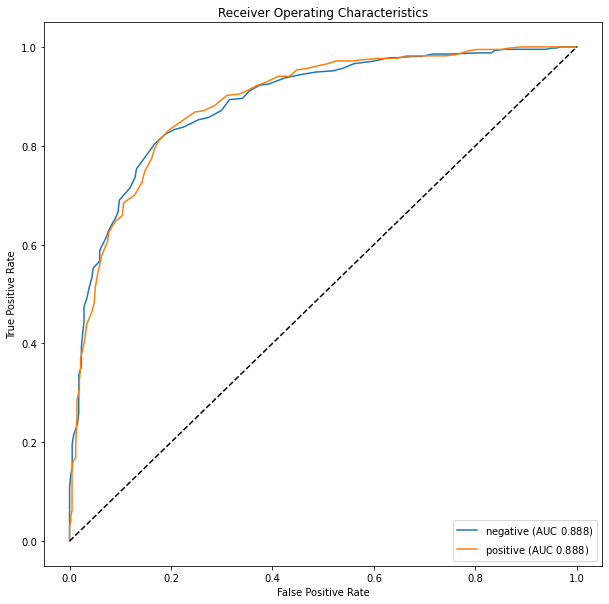

In [138]:
# ROC - testing
lucem_illud_2020.plotMultiROC(rf_imdb, coded_IMDB_test)

We can see the scores in the testing dataset are still high. Temporarily we say this algorithm works.

Now we predict the uncoded examples.

In [139]:
uncoded_IMDB['sentiment_rf'] = rf_imdb.predict(np.stack(uncoded_IMDB['vect'], axis=0))
uncoded_IMDB

,movie_name,review_title,review_time,reviews_words,vect,sentiment_logistic,category,sentiment_naivebayes,sentiment_dt,sentiment_rf
0,Cover Girl (1944),Gene Kelly's pivotal role and Rita Hayworth's...,7 March 2003,Cover Girl's importance lies not in its origin...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive
1,Cover Girl (1944),Put To The Test And Passes With Flying Colors\n,3 February 2007,It took a loan out film to Columbia for Gene K...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,negative
2,Cover Girl (1944),Energetic and Fun\n,19 April 2004,"For a non-MGM musical from the 1940s, this is ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive
3,Cover Girl (1944),An Extravaganza of Music and A Good Story too!\n,28 March 2002,A good story about Rusty Parker (Rita Hayworth...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,negative,positive,negative,negative
4,Cover Girl (1944),Cover Girl Shines\n,14 November 2003,"""Cover Girl"" is the best musical Rita Hayworth...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive
...,...,...,...,...,...,...,...,...,...,...
8420,Take the High Ground! (1953),Two Combat Veterans Lead New Recruits Through...,7 August 2010,The staple of war movies is the Basic Training...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive
8421,Take the High Ground! (1953),Basic training during Korean war with a stell...,26 June 2010,This is an overlooked military film about basi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive
8422,Take the High Ground! (1953),Straightforward story of one Sergeant's missi...,30 December 2004,(No spoilers in this first paragraph.) The mov...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive
8423,Take the High Ground! (1953),Uninspiring\n,7 August 2016,"All things considered there's nothing ""wrong"" ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,negative,positive,negative


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


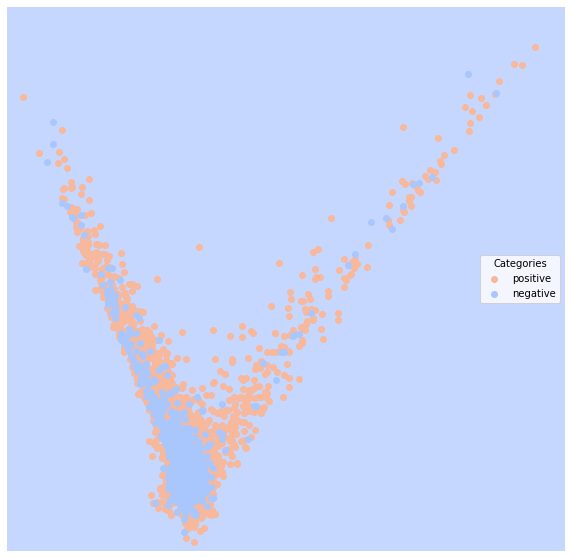

In [140]:
uncoded_IMDB['category'] = uncoded_IMDB['sentiment_rf']
lucem_illud_2020.plotregions(rf_imdb, uncoded_IMDB)

### Ensemble

In [141]:
tree_imdb = sklearn.tree.DecisionTreeClassifier(max_depth=10) 
bag_imdb = sklearn.ensemble.BaggingClassifier(tree_imdb, n_estimators=100, max_samples=0.8, random_state=1)
bag_imdb.fit(np.stack(coded_IMDB_train['vect'], axis =0), coded_IMDB_train['category'])

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=10,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=None,
  

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


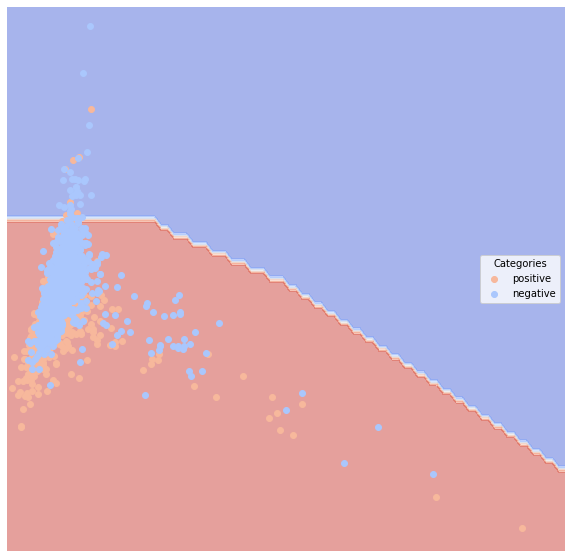

In [142]:
# Tree visualization
# Training
lucem_illud_2020.plotregions(bag_imdb, coded_IMDB_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


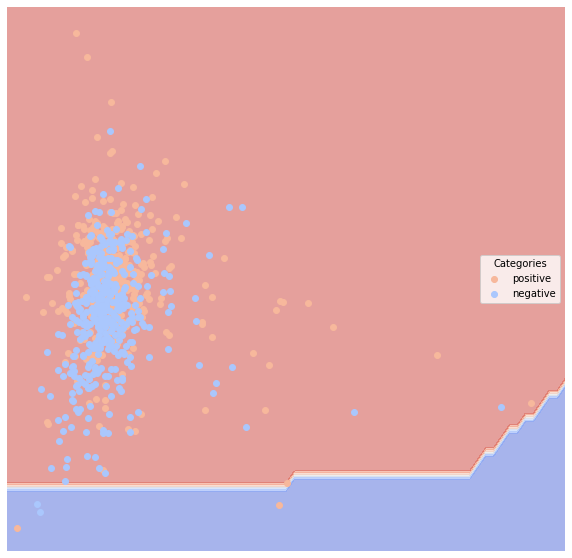

In [143]:
# Testing
lucem_illud_2020.plotregions(bag_imdb, coded_IMDB_test)

Now we can see the relevant metrics.

In [144]:
# Training
train_bag_scores = lucem_illud_2020.evaluateClassifier(bag_imdb, coded_IMDB_train)
train_bag_scores['Accuracy_Score'] = 1 - train_bag_scores['Error_Rate']
train_bag_scores

,Error_Rate,AUC,Precision,Average_Precision,Recall,Accuracy_Score
Category,,,,,,
positive,0.25375,0.75023,0.671513,0.661186,0.943204,0.74625
negative,0.25375,0.75023,0.910911,0.733549,0.557257,0.74625


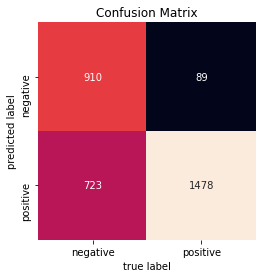

In [145]:
lucem_illud_2020.plotConfusionMatrix(bag_imdb, coded_IMDB_train)

In [146]:
# Testing
test_bag_scores = lucem_illud_2020.evaluateClassifier(bag_imdb, coded_IMDB_test)
test_bag_scores['Accuracy_Score'] = 1 - test_bag_scores['Error_Rate']
test_bag_scores

,Error_Rate,AUC,Precision,Average_Precision,Recall,Accuracy_Score
Category,,,,,,
positive,0.31125,0.695131,0.625000,0.609671,0.891473,0.68875
negative,0.31125,0.695131,0.830645,0.673067,0.498789,0.68875


In [147]:
# Testing scores of decision tree algorithm
test_dt_scores

,Error_Rate,AUC,Precision,Average_Precision,Recall,Accuracy_Score
Category,,,,,,
positive,0.45,0.563433,0.518519,0.517710,0.976744,0.55
negative,0.45,0.563433,0.873239,0.569842,0.150121,0.55


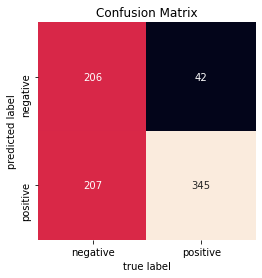

In [148]:
lucem_illud_2020.plotConfusionMatrix(bag_imdb, coded_IMDB_test)

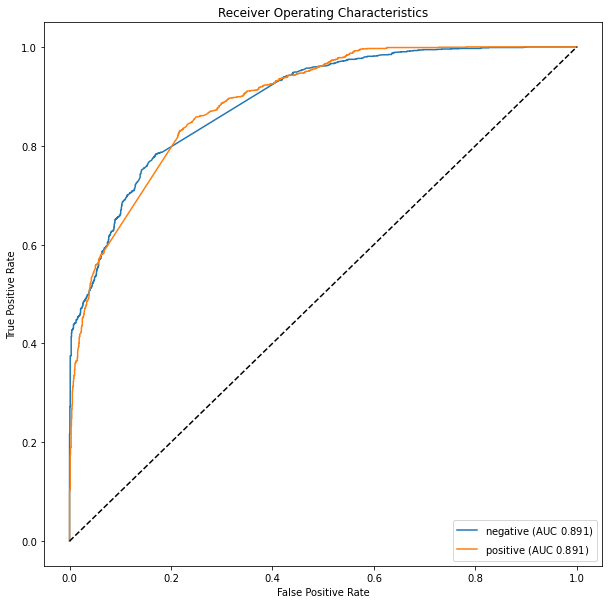

In [149]:
# ROC - training
lucem_illud_2020.plotMultiROC(bag_imdb, coded_IMDB_train)

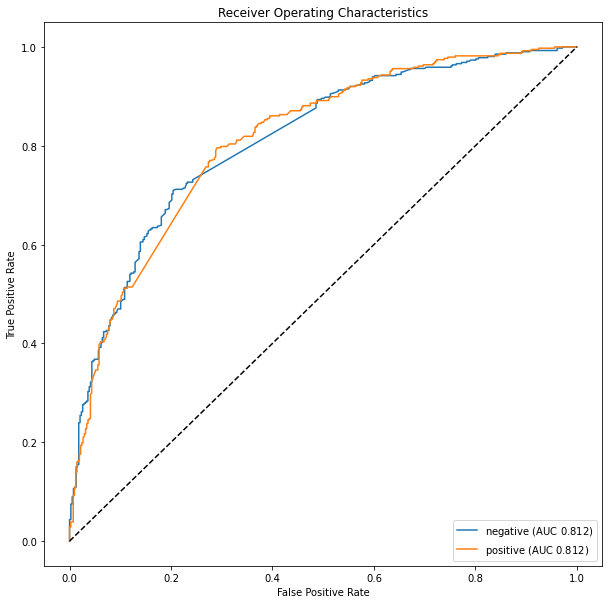

In [150]:
# ROC - testing
lucem_illud_2020.plotMultiROC(bag_imdb, coded_IMDB_test)

Now we predict the uncoded samples.

In [151]:
uncoded_IMDB['sentiment_bag'] = bag_imdb.predict(np.stack(uncoded_IMDB['vect'], axis=0))
uncoded_IMDB

,movie_name,review_title,review_time,reviews_words,vect,sentiment_logistic,category,sentiment_naivebayes,sentiment_dt,sentiment_rf,sentiment_bag
0,Cover Girl (1944),Gene Kelly's pivotal role and Rita Hayworth's...,7 March 2003,Cover Girl's importance lies not in its origin...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive
1,Cover Girl (1944),Put To The Test And Passes With Flying Colors\n,3 February 2007,It took a loan out film to Columbia for Gene K...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,negative,positive,positive,negative,positive
2,Cover Girl (1944),Energetic and Fun\n,19 April 2004,"For a non-MGM musical from the 1940s, this is ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive
3,Cover Girl (1944),An Extravaganza of Music and A Good Story too!\n,28 March 2002,A good story about Rusty Parker (Rita Hayworth...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,negative,positive,negative,negative,negative
4,Cover Girl (1944),Cover Girl Shines\n,14 November 2003,"""Cover Girl"" is the best musical Rita Hayworth...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...
8420,Take the High Ground! (1953),Two Combat Veterans Lead New Recruits Through...,7 August 2010,The staple of war movies is the Basic Training...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive
8421,Take the High Ground! (1953),Basic training during Korean war with a stell...,26 June 2010,This is an overlooked military film about basi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive
8422,Take the High Ground! (1953),Straightforward story of one Sergeant's missi...,30 December 2004,(No spoilers in this first paragraph.) The mov...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive
8423,Take the High Ground! (1953),Uninspiring\n,7 August 2016,"All things considered there's nothing ""wrong"" ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,negative,negative,positive,negative,positive


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


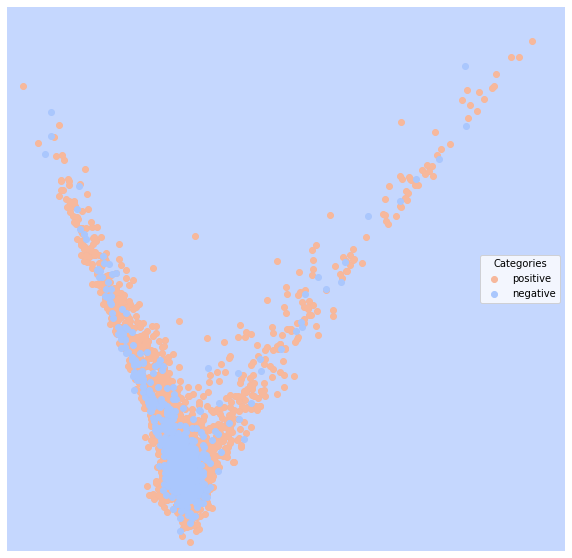

In [152]:
uncoded_IMDB['category'] = uncoded_IMDB['sentiment_bag']
lucem_illud_2020.plotregions(bag_imdb, uncoded_IMDB)

Ensemble is to combine several models to improve the final performances. Thus, an ensemble model is expected to work better than a single-algorithm model.In my model, the bagging method uses 100 decision tree estimators and each tree uses at most 80% of the whole data. Considering all the scores, we can find that ensemble works well in this dataset. Comparing the scores of the ensemble model and the decision tree model, we find that the ensemble model does work better.

# K-Nearest Neighbors

The K-Nearest neighbors classifier takes a simpler premise than those before: Find the closest labeled datapoint in set and "borrow" its label.

Let's use newsgroup data again.

In [153]:
newsgroupsDF[:5]

,text,category,source_file,tokenized_text,normalized_text
0,\n\nParadise and salvation are not the same th...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Paradise, and, salvation, are, not, the, same...","[paradise, salvation, thing, salvation, well, ..."
1,\nYou're admitting a lot more than that. You ...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[You, 're, admitting, a, lot, more, than, that...","[admit, lot, admit, moral, situational, admit,..."
2,"\n\nJesus also recognized other holy days, lik...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[Jesus, also, recognized, other, holy, days, l...","[jesus, recognize, holy, day, like, passover, ..."
3,In <lsjc8cINNmc1@saltillo.cs.utexas.edu> turpi...,talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[In, <, lsjc8cINNmc1@saltillo.cs.utexas.edu, >...","[<, lsjc8cinnmc1@saltillo.cs.utexas.edu, >, tu..."
4,"\nI'm sorry, but He does not! Ever read the F...",talk.religion.misc,../data/20news_home/20news-bydate-train/talk.r...,"[I, 'm, sorry, but, He, does, not, Ever, read,...","[be, sorry, read, commandment]"


Make a testing and training set:

In [154]:
holdBackFraction = .2
train_ng_df, test_ng_df = lucem_illud_2020.trainTestSplit(newsgroupsDF, holdBackFraction=holdBackFraction)

Let's initialize our k-nearest neighbors classifier:

In [155]:
n_neighbors = 15
weights="uniform"
clf_knearest = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)

Let's try to classify using the TF-IDF vectors:

In [156]:
TFVectorizer_ng = sklearn.feature_extraction.text.TfidfVectorizer(max_df=100, min_df=2, stop_words='english', norm='l2')
TFVects_ng = TFVectorizer_ng.fit_transform(train_ng_df['text'])
train_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_ng.todense()]

In [157]:
clf_knearest.fit(np.stack(train_ng_df['vect'], axis = 0), train_ng_df['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

In [158]:
lucem_illud_2020.evaluateClassifier(clf_knearest, train_ng_df)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
soc.religion.christian,0.273360,0.502114,1.000000,0.277589,0.004228
talk.religion.misc,0.258270,0.649713,0.347439,0.264194,0.506494
comp.graphics,0.390598,0.601968,0.357713,0.319913,0.586057
sci.space,0.316309,0.619721,0.440385,0.356212,0.474120


And lets look at the testing data

In [159]:
#Create vectors
TFVects_test = TFVectorizer_ng.transform(test_ng_df['text'])
test_ng_df['vect'] = [np.array(v).flatten() for v in TFVects_test.todense()]

#Add to df
test_ng_df['nb_predict'] = clf_knearest.predict(np.stack(test_ng_df['vect'], axis=0))

#Test
print("Testing score:")
print(clf_knearest.score(np.stack(test_ng_df['vect'], axis=0), test_ng_df['category']))

Testing score:
0.2627906976744186


Let's produce another confusion matrix:

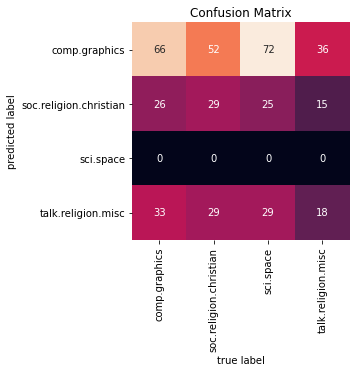

In [160]:
lucem_illud_2020.plotConfusionMatrix(clf_knearest, test_ng_df)

You can produce the PCA space visual if you want, altough it can take a very long time, so we'll leave it optionally commented out:

In [161]:
#lucem_illud_2020.plotregions(clf_knearest, test_ng_df)

## <span style="color:red">*Exercise 4*</span>

<span style="color:red">In the cells immediately following, perform and visualize k-nearest neighbor classification using training, testing and extrapolation (uncoded) data from texts and hand-classifications associated with your final project. Visualize the classification of data points and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). Articulate how the *k*-nearest neighbor approach relates to *k*-means clustering explored in ***week 3***?

In [162]:
n_neighbors = 15
weights="uniform"
knn_imdb = sklearn.neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
knn_imdb.fit(np.stack(coded_IMDB_train['vect'], axis =0), coded_IMDB_train['category'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=15, p=2,
                     weights='uniform')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


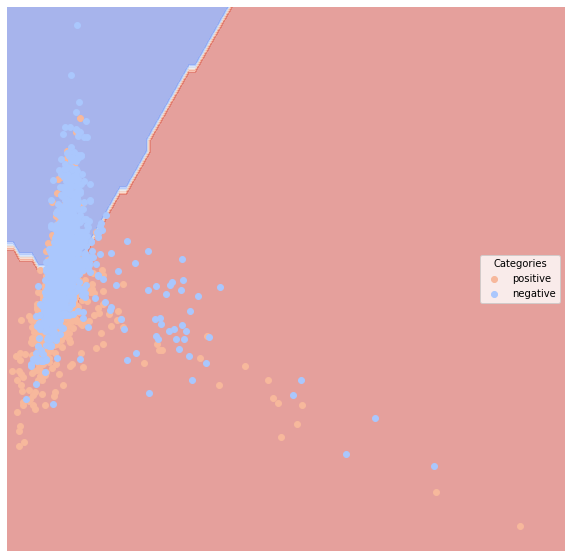

In [163]:
# Tree visualization
# Training
lucem_illud_2020.plotregions(knn_imdb, coded_IMDB_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


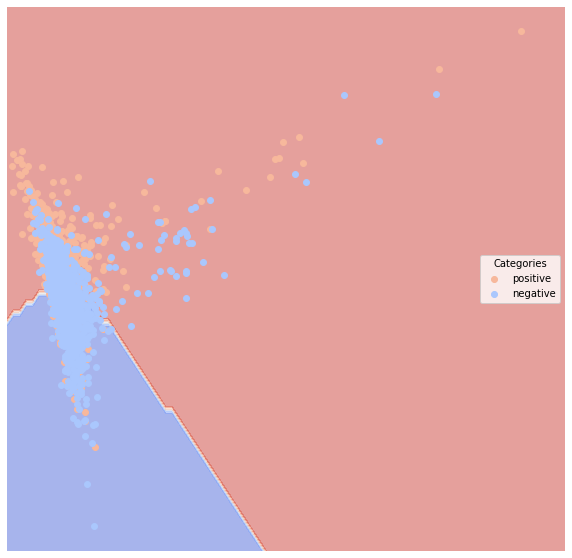

In [164]:
# Testing
lucem_illud_2020.plotregions(knn_imdb, coded_IMDB_train)

Now we can see the relevant metrics.

In [165]:
# Training
train_knn_scores = lucem_illud_2020.evaluateClassifier(knn_imdb, coded_IMDB_train)
train_knn_scores['Accuracy_Score'] = 1 - train_knn_scores['Error_Rate']
train_knn_scores

,Error_Rate,AUC,Precision,Average_Precision,Recall,Accuracy_Score
Category,,,,,,
positive,0.250938,0.749194,0.738155,0.677425,0.755584,0.749062
negative,0.250938,0.749194,0.760025,0.695800,0.742805,0.749062


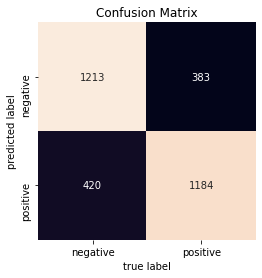

In [166]:
lucem_illud_2020.plotConfusionMatrix(knn_imdb, coded_IMDB_train)

In [167]:
# Testing
test_knn_scores = lucem_illud_2020.evaluateClassifier(knn_imdb, coded_IMDB_test)
test_knn_scores['Accuracy_Score'] = 1 - test_knn_scores['Error_Rate']
test_knn_scores

,Error_Rate,AUC,Precision,Average_Precision,Recall,Accuracy_Score
Category,,,,,,
positive,0.315,0.685318,0.667494,0.611469,0.695090,0.685
negative,0.315,0.685318,0.702771,0.642253,0.675545,0.685


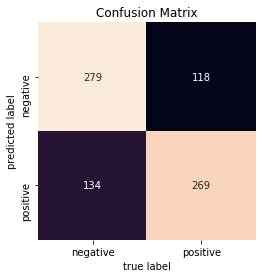

In [168]:
lucem_illud_2020.plotConfusionMatrix(knn_imdb, coded_IMDB_test)

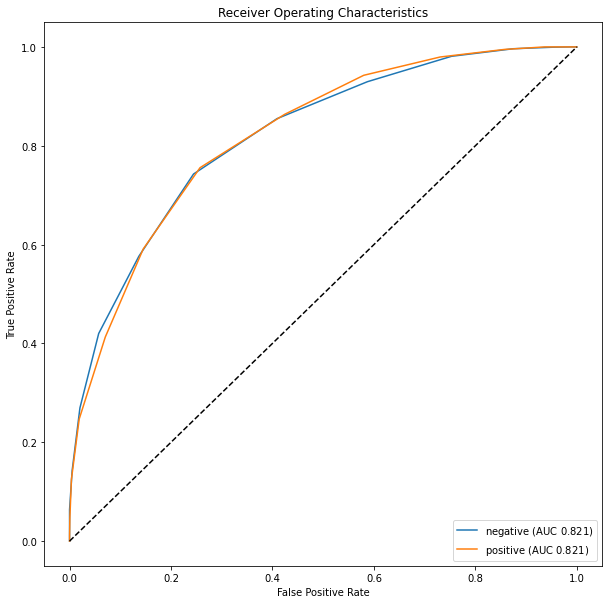

In [169]:
# ROC - training
lucem_illud_2020.plotMultiROC(knn_imdb, coded_IMDB_train)

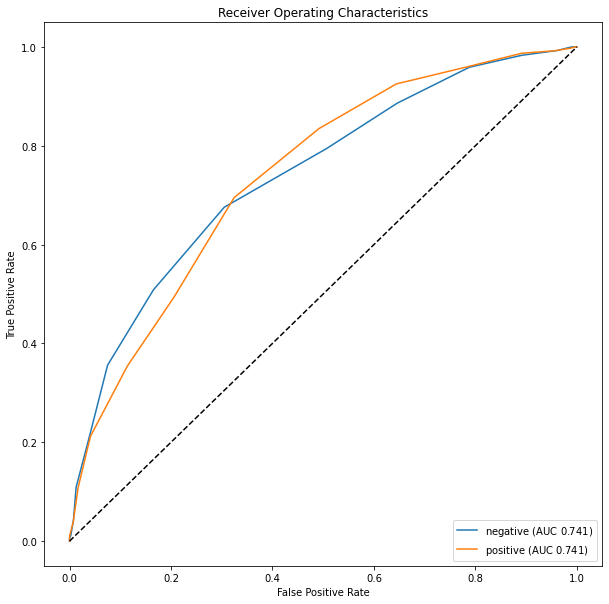

In [170]:
# ROC - testing
lucem_illud_2020.plotMultiROC(knn_imdb, coded_IMDB_test)

Now we predict the uncoded samples.

In [171]:
uncoded_IMDB['sentiment_knn'] = knn_imdb.predict(np.stack(uncoded_IMDB['vect'], axis=0))
uncoded_IMDB

,movie_name,review_title,review_time,reviews_words,vect,sentiment_logistic,category,sentiment_naivebayes,sentiment_dt,sentiment_rf,sentiment_bag,sentiment_knn
0,Cover Girl (1944),Gene Kelly's pivotal role and Rita Hayworth's...,7 March 2003,Cover Girl's importance lies not in its origin...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive,positive
1,Cover Girl (1944),Put To The Test And Passes With Flying Colors\n,3 February 2007,It took a loan out film to Columbia for Gene K...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,negative,positive,positive
2,Cover Girl (1944),Energetic and Fun\n,19 April 2004,"For a non-MGM musical from the 1940s, this is ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive,positive
3,Cover Girl (1944),An Extravaganza of Music and A Good Story too!\n,28 March 2002,A good story about Rusty Parker (Rita Hayworth...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,negative,positive,negative,negative,negative,positive
4,Cover Girl (1944),Cover Girl Shines\n,14 November 2003,"""Cover Girl"" is the best musical Rita Hayworth...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Take the High Ground! (1953),Two Combat Veterans Lead New Recruits Through...,7 August 2010,The staple of war movies is the Basic Training...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive,positive
8421,Take the High Ground! (1953),Basic training during Korean war with a stell...,26 June 2010,This is an overlooked military film about basi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive,positive
8422,Take the High Ground! (1953),Straightforward story of one Sergeant's missi...,30 December 2004,(No spoilers in this first paragraph.) The mov...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive,positive
8423,Take the High Ground! (1953),Uninspiring\n,7 August 2016,"All things considered there's nothing ""wrong"" ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,negative,positive,negative,positive,positive


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


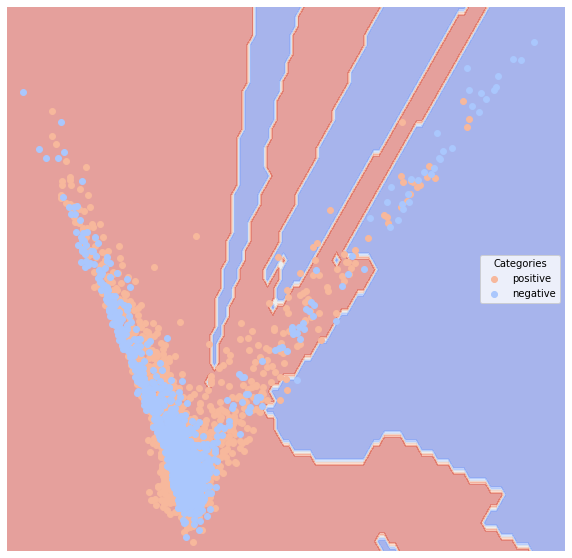

In [172]:
uncoded_IMDB['category'] = uncoded_IMDB['sentiment_knn']
lucem_illud_2020.plotregions(knn_imdb, uncoded_IMDB)

#### Discussion about KNN and K-means

They both have k in the name, but in k-means, it refers to the number of clusters, but in KNN, k means the number of neighbors. KNN is a supervised machine learning method.In this point, when we encounter an unlabeled data point, we pick the label of this data according to the nearest points' properties and the number of nearest points we pick is K.K-means clustering is an unsupervised machine learning method. In this method, we divide data into several groups, and we use the point of the cluster centroid to label the data in each group. K refers to the number of groups that we divide data into.

# SVMs

Now we will examine Support Vector Machines, an approach that creates the partition that preserves the "maximum margin" between classes.

We will use a few sub forums from reddit--which tend to share text rather than memes--namely `talesfromtechsupport`, `badroommates`, `weeabootales` and `relationships`. The top 100 text posts from each have been saved to `data/reddit.csv`.

In [173]:
redditDf = pandas.read_csv('../data/reddit.csv', index_col = 0)

#Drop a couple missing values

redditDf = redditDf.dropna()

#Set category

redditDf['category'] = redditDf['subreddit']

#tokenize and normalize
redditDf['tokenized_text'] = redditDf['text'].apply(lambda x: lucem_illud_2020.word_tokenize(x))
redditDf['normalized_text'] = redditDf['tokenized_text'].apply(lambda x: lucem_illud_2020.normalizeTokens(x))

We will tf.idf the data to make our vectors:

In [174]:
redditTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, min_df=3, stop_words='english', norm='l2')
redditTFVects = redditTFVectorizer.fit_transform([' '.join(l) for l in redditDf['normalized_text']])
redditDf['vect'] = [np.array(v).flatten() for v in redditTFVects.todense()]

Initilize the model and make a train test split:

In [175]:
holdBackFraction = .2
train_redditDf, test_redditDf = lucem_illud_2020.trainTestSplit(redditDf, holdBackFraction=holdBackFraction)

In [176]:
clf_svm = sklearn.svm.SVC(kernel='linear', probability = False)
#probability = True is slower but  lets you call predict_proba()
clf_svm.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

...and consider the results:

In [177]:
lucem_illud_2020.evaluateClassifier(clf_svm, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Weeaboo Tales: stories about the extreme fans of japanese culture,0.006270,0.984615,1.000000,0.975500,0.969231
Bad Roommates: Tales of Irritation,0.009404,0.990273,0.979167,0.971994,0.989474
Relationships,0.009404,0.989792,0.976471,0.967981,0.988095
Tales From Tech Support,0.006270,0.991284,0.986667,0.976646,0.986667


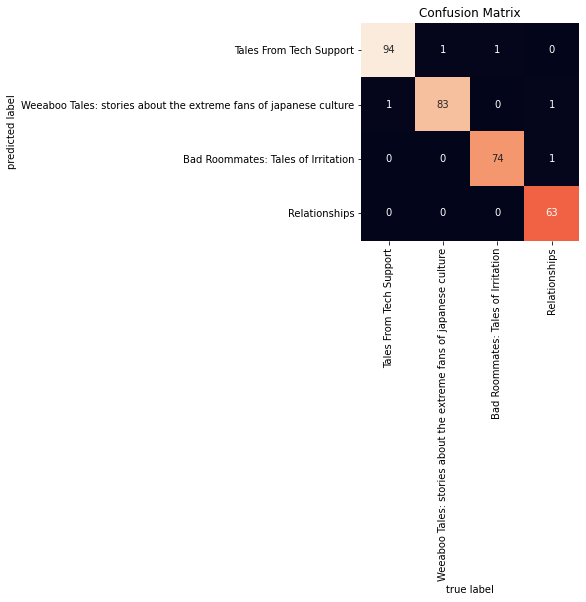

In [178]:
lucem_illud_2020.plotConfusionMatrix(clf_svm, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

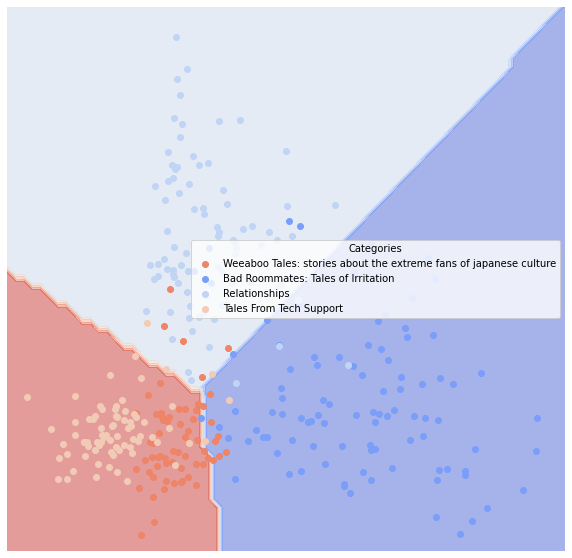

In [179]:
lucem_illud_2020.plotregions(clf_svm, test_redditDf)

# Neural Nets

We include an example of a simple neural network, the Multi-layer Perceptron (MLP) that learns a function $f(\cdot): R^m \rightarrow R^o$ by training on a dataset, where $m$ is the number of dimensions for input and $o$ is the number of dimensions for output. Given a set of features $X = {x_1, x_2, ..., x_m}$ and a target $y$, it can learn a non-linear function approximator for either classification or regression. It is different from logistic regression, in that between the input and the output layer, there can be one or more non-linear layers, called hidden layers. The following figure shows a one hidden layer MLP with scalar output. ![title](../data/multilayerperceptron_network.png) The leftmost layer, known as the input layer, consists of a set of "neurons" $\{x_i | x_1, x_2, ..., x_m\}$ representing the input features (e.g., weighted words). Each neuron in the hidden layer transforms the values from the previous layer with a weighted linear summation $w_1x_1 + w_2x_2 + ... + w_mx_m$, followed by a non-linear activation function $g(\cdot):R \rightarrow R$ - like the logistic or hyperbolic tan function. The output layer receives the values from the last hidden layer and transforms them into output values.

In [180]:
clf_nn = sklearn.neural_network.MLPClassifier()
clf_nn.fit(np.stack(train_redditDf['vect'], axis=0), train_redditDf['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [181]:
lucem_illud_2020.evaluateClassifier(clf_nn, test_redditDf)

,Error_Rate,AUC,Precision,Average_Precision,Recall
Category,,,,,
Weeaboo Tales: stories about the extreme fans of japanese culture,0.006270,0.990339,0.984615,0.972602,0.984615
Bad Roommates: Tales of Irritation,0.012539,0.991071,0.959596,0.959596,1.000000
Relationships,0.015674,0.974063,0.987654,0.953162,0.952381
Tales From Tech Support,0.003135,0.993333,1.000000,0.989801,0.986667


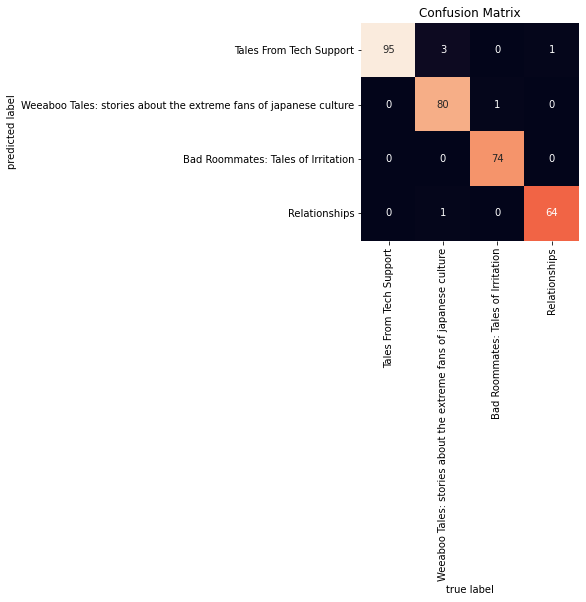

In [182]:
lucem_illud_2020.plotConfusionMatrix(clf_nn, test_redditDf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

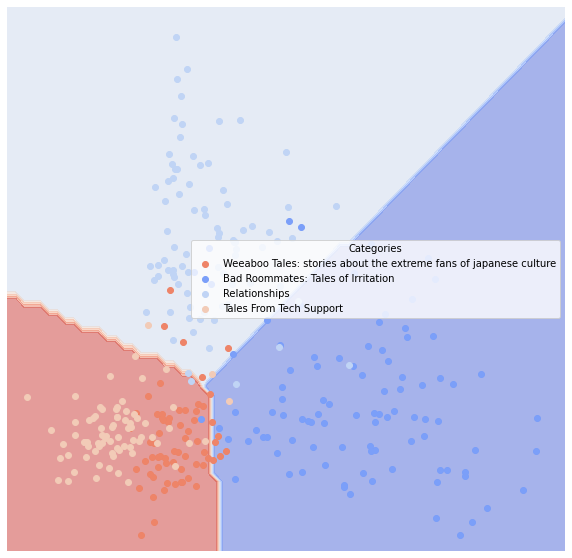

In [183]:
lucem_illud_2020.plotregions(clf_nn, test_redditDf)

It performs very well.

## <span style="color:red">*Exercise 5*</span>

<span style="color:red">In the cells immediately following, perform a neural network classification and calculate relevant metrics (e.g., precision, recall, the F-measure, and AUC). How does this classify relevant to *k*-nearest neighbor, Naive Bayes, logistic and decision-tree approaches?

In [184]:
nn_imdb = sklearn.neural_network.MLPClassifier()
nn_imdb.fit(np.stack(coded_IMDB_train['vect'], axis =0), coded_IMDB_train['category'])

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


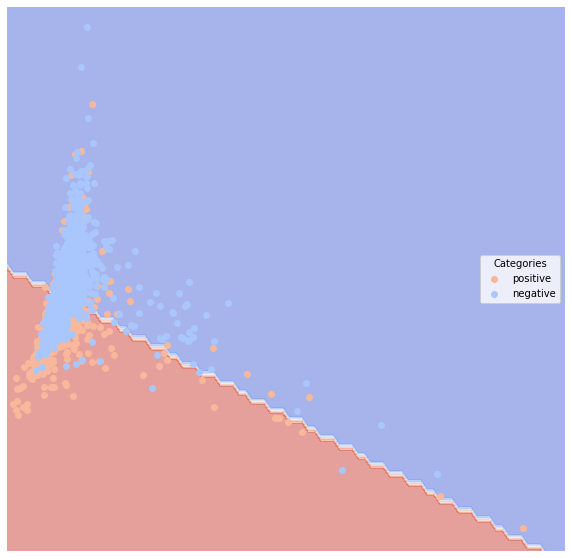

In [185]:
# Tree visualization
# Training
lucem_illud_2020.plotregions(nn_imdb, coded_IMDB_train)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


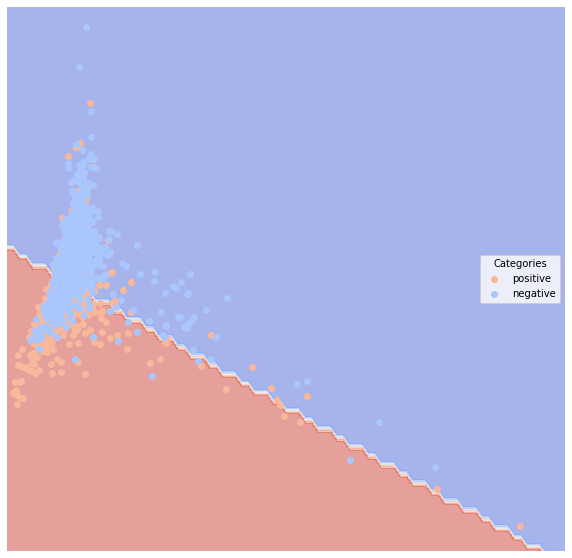

In [186]:
# Testing
lucem_illud_2020.plotregions(nn_imdb, coded_IMDB_train)

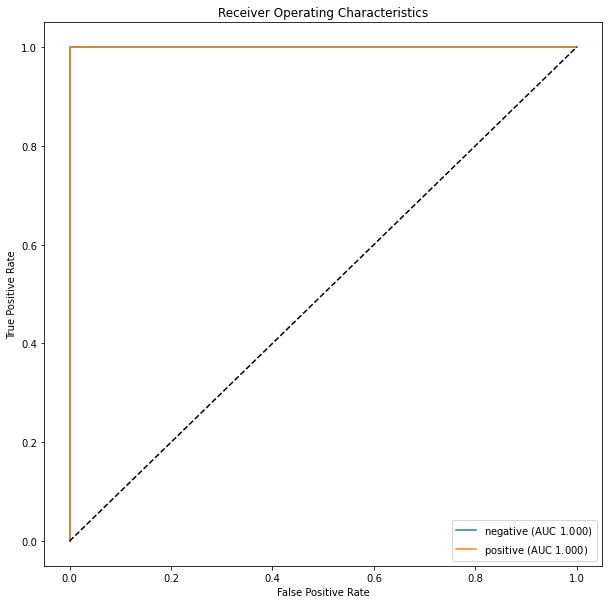

In [187]:
# ROC - training
lucem_illud_2020.plotMultiROC(nn_imdb, coded_IMDB_train)

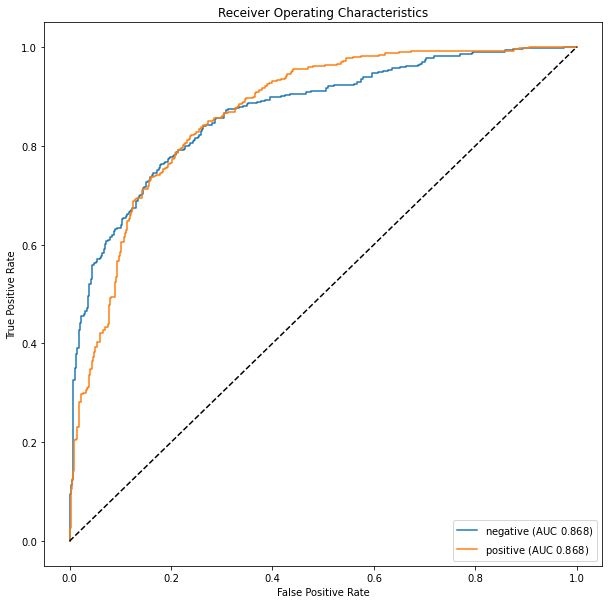

In [188]:
# ROC - testing
lucem_illud_2020.plotMultiROC(nn_imdb, coded_IMDB_test)

Now we can see the relevant metrics.

In [189]:
# Training
train_nn_scores = lucem_illud_2020.evaluateClassifier(nn_imdb, coded_IMDB_train)
train_nn_scores['Accuracy_Score'] = 1 - train_nn_scores['Error_Rate']
train_nn_scores

,Error_Rate,AUC,Precision,Average_Precision,Recall,Accuracy_Score
Category,,,,,,
positive,0.0,1.0,1.0,1.0,1.0,1.0
negative,0.0,1.0,1.0,1.0,1.0,1.0


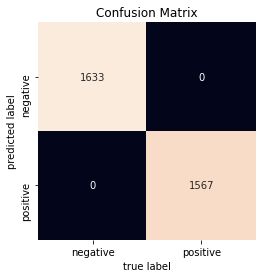

In [190]:
lucem_illud_2020.plotConfusionMatrix(nn_imdb, coded_IMDB_train)

In [191]:
# Testing
test_nn_scores = lucem_illud_2020.evaluateClassifier(nn_imdb, coded_IMDB_test)
test_nn_scores['Accuracy_Score'] = 1 - test_nn_scores['Error_Rate']
test_nn_scores

,Error_Rate,AUC,Precision,Average_Precision,Recall,Accuracy_Score
Category,,,,,,
positive,0.2125,0.788658,0.75772,0.709580,0.824289,0.7875
negative,0.2125,0.788658,0.82058,0.745419,0.753027,0.7875


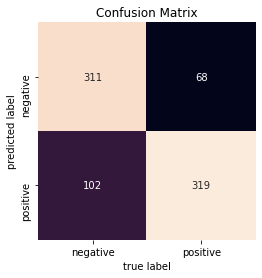

In [192]:
lucem_illud_2020.plotConfusionMatrix(nn_imdb, coded_IMDB_test)

Now we predict the uncoded samples.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


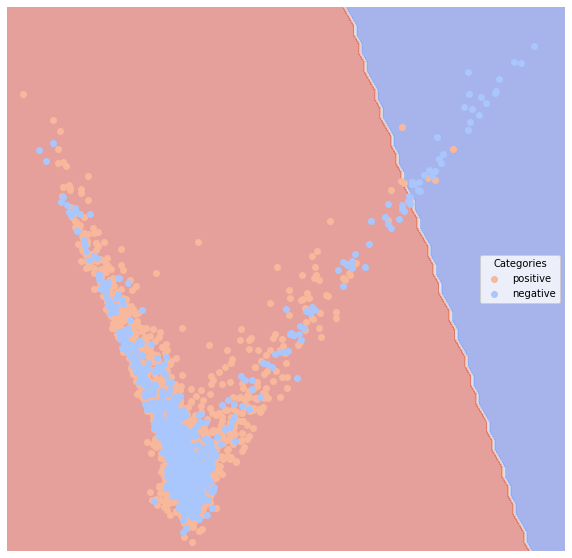

In [193]:
uncoded_IMDB['sentiment_nn'] = nn_imdb.predict(np.stack(uncoded_IMDB['vect'], axis=0))
uncoded_IMDB['category'] = uncoded_IMDB['sentiment_nn']
lucem_illud_2020.plotregions(nn_imdb, uncoded_IMDB)

In [194]:
uncoded_IMDB

,movie_name,review_title,review_time,reviews_words,vect,sentiment_logistic,category,sentiment_naivebayes,sentiment_dt,sentiment_rf,sentiment_bag,sentiment_knn,sentiment_nn
0,Cover Girl (1944),Gene Kelly's pivotal role and Rita Hayworth's...,7 March 2003,Cover Girl's importance lies not in its origin...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive,positive,positive
1,Cover Girl (1944),Put To The Test And Passes With Flying Colors\n,3 February 2007,It took a loan out film to Columbia for Gene K...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,negative,positive,positive,positive
2,Cover Girl (1944),Energetic and Fun\n,19 April 2004,"For a non-MGM musical from the 1940s, this is ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive,positive,positive
3,Cover Girl (1944),An Extravaganza of Music and A Good Story too!\n,28 March 2002,A good story about Rusty Parker (Rita Hayworth...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,negative,negative,negative,positive,positive
4,Cover Girl (1944),Cover Girl Shines\n,14 November 2003,"""Cover Girl"" is the best musical Rita Hayworth...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive,positive,positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8420,Take the High Ground! (1953),Two Combat Veterans Lead New Recruits Through...,7 August 2010,The staple of war movies is the Basic Training...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive,positive,positive
8421,Take the High Ground! (1953),Basic training during Korean war with a stell...,26 June 2010,This is an overlooked military film about basi...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive,positive,positive
8422,Take the High Ground! (1953),Straightforward story of one Sergeant's missi...,30 December 2004,(No spoilers in this first paragraph.) The mov...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,positive,positive,positive,positive,positive,positive
8423,Take the High Ground! (1953),Uninspiring\n,7 August 2016,"All things considered there's nothing ""wrong"" ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",positive,positive,negative,positive,negative,positive,positive,positive


#### Discussion on algorithms

All these algorithms can deal with classification problems, but each of them has own advantages and disadvantages.
1. The classification accuracy of the neural network is high, and it has strong robustness and fault tolerance to noise. Neural networks have the function of associative memory, which can fully approximate complex nonlinear relationships. However, neural networks require a large number of parameters. We cannot observe the learning process of neural networks. In addition, there may be problems of too long learning time and falling into the local minimum, which makes the neural network may not even achieve the purpose of learning.
2. Both neural networks and KNN can be used for image processing.KNN is particularly suitable for multi-classification problems, and KNN performs better than SVM. A shortcoming of this method is the large amount of calculation, because for each text to be classified, the distance to all known samples must be calculated to obtain its K nearest neighbors.
3. Naive Bayes has a high speed for large amounts of training and query, performs well on small-scale data, and can handle multiple classification tasks. In addition, it is less sensitive to missing data. However, the use of Naive Bayes requires calculation of a priori probabilities. More importantly, since the assumption of independence of sample attributes is used, the effect is not good if the sample attributes are related.
4. Logistic regression can solve the problem of multicollinearity, but it is easy to underfit and the accuracy is generally not very high. In addition, logistic regression can only deal with two-classification problems, and must be linearly separable. For non-linear features, we need to transform the data.
5. Decision tree can process nominal and numeric data at the same time, it is more suitable for processing samples with missing attributes, and it can also handle unrelated features. When testing a data set, it runs faster and can produce feasible and effective results for large data sources in a relatively short period of time. However, decision trees are prone to overfitting (random forests can greatly reduce overfitting), and it is easy to ignore the correlation of attributes in the data set. For data with inconsistent sample sizes in different categories, different decision criteria will bring different tendencies for attribute selection when the decision tree performs attribute division.